
















# Imports

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import numpy as np
import statsmodels.api as sm

# Prepare Data

In [2]:
df_origin=pd.read_csv('C:\\Users\\iaras\\MECD\\Estatistica\\trabalho\\WattWise\\UPAC_Total_Production2.csv',sep=';')

In [3]:
df_origin.head(10)

,Quarter,District,Municipality,Parish,Zip Code,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),DistrictCode,Municipality Code,DistrictMunicipalityParishCode,CPEs (#),relacao_instalacoes_por_cpe,relacao_potencia_por_cpe
0,2023T1,Coimbra,Condeixa-a-Nova,Furadouro,3150,Solar,BTN,"]0, 4]",2,3.00,6,604,060407,9537.0,0.000210,0.000315
1,2023T1,Coimbra,Condeixa-a-Nova,Zambujal,3150,Solar,BTN,"]0, 4]",2,4.32,6,604,060410,9537.0,0.000210,0.000453
2,2023T1,Coimbra,Condeixa-a-Nova,Condeixa-a-Velha e Condeixa-a-Nova,3150,Não Atribuído,BTN,"]0, 4]",1,1.05,6,604,060411,9537.0,0.000105,0.000110
3,2023T1,Coimbra,Condeixa-a-Nova,Vila Seca e Bem da Fé,3150,Solar,BTN,"]0, 4]",17,28.14,6,604,060413,9537.0,0.001783,0.002951
4,2023T1,Coimbra,Figueira da Foz,São Pedro,3090,Não Atribuído,BTN,"]0, 4]",2,3.28,6,605,060514,50436.0,0.000040,0.000065
5,2023T1,Coimbra,Figueira da Foz,Moinhos da Gândara,3080,Não Atribuído,BTN,"]0, 4]",1,2.00,6,605,060518,50436.0,0.000020,0.000040
6,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,3080,Não Atribuído,BTN,"]0, 4]",9,13.59,6,605,060520,50436.0,0.000178,0.000269
7,2023T1,Coimbra,Figueira da Foz,Buarcos e São Julião,3080,Solar,BTN,"]0, 4]",128,202.51,6,605,060520,50436.0,0.002538,0.004015
8,2023T1,Coimbra,Figueira da Foz,Ferreira-a-Nova,3090,Não Atribuído,BTN,"]0, 4]",3,4.96,6,605,060521,50436.0,0.000059,0.000098
9,2023T1,Coimbra,Figueira da Foz,Lavos,3090,Solar,BTN,"]0, 4]",93,112.51,6,605,060522,50436.0,0.001844,0.002231


In [5]:
# Rename the last two columns to English
df_origin = df_origin.rename(columns={
    "relacao_instalacoes_por_cpe": "installations_per_cpe_ratio",
    "relacao_potencia_por_cpe": "power_per_cpe_ratio"
})

print(df_origin.columns)


Index(['Quarter', 'District', 'Municipality', 'Parish', 'Zip Code',
       'Technology Type', 'Voltage level', 'Installed power range (kW)',
       'Number of installations', 'Total installed power (kW)', 'DistrictCode',
       'Municipality Code', 'DistrictMunicipalityParishCode', 'CPEs (#)',
       'installations_per_cpe_ratio', 'power_per_cpe_ratio'],
      dtype='object')


In [8]:
print(df_origin['Technology Type'].dtype)


object


In [13]:
# Select only the non-numeric columns
non_numeric = df_origin.select_dtypes(exclude=['number'])

# Show the names of non-numeric columns
print("Non-numeric columns:")
print(non_numeric.columns.tolist())

Non-numeric columns:
['Quarter', 'District', 'Municipality', 'Parish', 'Technology Type', 'Voltage level', 'Installed power range (kW)', 'DistrictMunicipalityParishCode']


In [ ]:
non_numeric = df_origin.select_dtypes(exclude=['number'])


for col in non_numeric.columns:
    unique_vals = df_origin[col].unique().tolist() 
    print(f"Column: {col} — {len(unique_vals)} unique values")
    print(unique_vals)
    print("-" * 40)


Column: Quarter — 11 unique values
['2023T1', '2023T2', '2024T2', '2024T3', '2024T4', '2023T3', '2023T4', '2024T1', '2025T1', '2025T2', '2022T4']
----------------------------------------
Column: District — 18 unique values
['Coimbra', 'Évora', 'Faro', 'Guarda', 'Leiria', 'Lisboa', 'Portalegre', 'Porto', 'Santarém', 'Setúbal', 'Viana do Castelo', 'Vila Real', 'Viseu', 'Aveiro', 'Beja', 'Braga', 'Bragança', 'Castelo Branco']
----------------------------------------
Column: Municipality — 278 unique values
['Condeixa-a-Nova', 'Figueira da Foz', 'Lousã', 'Mira', 'Miranda do Corvo', 'Montemor-o-Velho', 'Oliveira do Hospital', 'Pampilhosa da Serra', 'Penacova', 'Penela', 'Soure', 'Tábua', 'Vila Nova de Poiares', 'Alandroal', 'Arraiolos', 'Borba', 'Estremoz', 'Évora', 'Montemor-o-Novo', 'Mora', 'Portel', 'Redondo', 'Reguengos de Monsaraz', 'Vendas Novas', 'Viana do Alentejo', 'Vila Viçosa', 'Albufeira', 'Alcoutim', 'Aljezur', 'Castro Marim', 'Faro', 'Lagoa', 'Lagos', 'Loulé', 'Monchique', 'Ol

In [ ]:
# Translation dictionary
tech_type_translation = {
    'Solar': 'Solar',
    'Não Atribuído': 'Not Assigned',
    'Eólica': 'Wind',
    'Biogás': 'Biogas',
    'Cogeração não renovável': 'Non-renewable Cogeneration',
    'Hídrica': 'Hydro',
    'Biomassa': 'Biomass',
    'Fotovoltaica': 'Photovoltaic'
}

df_origin['Technology Type'] = df_origin['Technology Type'].map(tech_type_translation).fillna(df_origin['Technology Type'])
print(df_origin['Technology Type'].unique())


['Solar' 'Not Assigned' 'Wind' 'Biogas' 'Non-renewable Cogeneration'
 'Hydro' 'Biomass' 'Photovoltaic' nan]


### Data Selection

In [18]:
# Columns to keep (translated to English)
cols_keep = [
    'Quarter',
    'District',
    'Parish',
    'Municipality',
    'Technology Type',
    'Voltage level',
    'Installed power range (kW)',
    'Number of installations',
    'Total installed power (kW)'
]

# Filter the dataframe
df_filtered = df_origin[cols_keep]

# Show first 10 rows
df_filtered.head(10)


,Quarter,District,Parish,Municipality,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW)
0,2023T1,Coimbra,Furadouro,Condeixa-a-Nova,Solar,BTN,"]0, 4]",2,3.00
1,2023T1,Coimbra,Zambujal,Condeixa-a-Nova,Solar,BTN,"]0, 4]",2,4.32
2,2023T1,Coimbra,Condeixa-a-Velha e Condeixa-a-Nova,Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.05
3,2023T1,Coimbra,Vila Seca e Bem da Fé,Condeixa-a-Nova,Solar,BTN,"]0, 4]",17,28.14
4,2023T1,Coimbra,São Pedro,Figueira da Foz,Not Assigned,BTN,"]0, 4]",2,3.28
5,2023T1,Coimbra,Moinhos da Gândara,Figueira da Foz,Not Assigned,BTN,"]0, 4]",1,2.00
6,2023T1,Coimbra,Buarcos e São Julião,Figueira da Foz,Not Assigned,BTN,"]0, 4]",9,13.59
7,2023T1,Coimbra,Buarcos e São Julião,Figueira da Foz,Solar,BTN,"]0, 4]",128,202.51
8,2023T1,Coimbra,Ferreira-a-Nova,Figueira da Foz,Not Assigned,BTN,"]0, 4]",3,4.96
9,2023T1,Coimbra,Lavos,Figueira da Foz,Solar,BTN,"]0, 4]",93,112.51


In [19]:
# Desired quarters
desired_quarters = [
    '2023T1', '2023T2', '2023T3', '2023T4',
    '2024T1', '2024T2', '2024T3', '2024T4'
]

# Filter dataframe by desired quarters
df_filtered = df_filtered[df_filtered['Quarter'].isin(desired_quarters)]

# Check counts per quarter
print(df_filtered['Quarter'].value_counts())


Quarter
2023T3    13295
2024T4    11737
2024T3    11399
2024T2    11086
2024T1    10839
2023T1    10481
2023T4    10407
2023T2     9301
Name: count, dtype: int64


### Data Inspection and Cleaning

**Check for missing values**

In [20]:
print(df_filtered.isnull().sum())


Quarter                       0
District                      0
Parish                        0
Municipality                  0
Technology Type               0
Voltage level                 2
Installed power range (kW)    0
Number of installations       0
Total installed power (kW)    0
dtype: int64


In [21]:
df_filtered.shape


(88545, 9)

In [22]:
df_filtered = df_filtered.dropna()
df_filtered.shape

(88543, 9)

**Check for duplicate rows**

In [23]:
# Identify duplicate rows
duplicates = df_filtered[df_filtered.duplicated()]
print(duplicates)
print("Number of duplicates:", df_filtered.duplicated().sum())


       Quarter  District                                             Parish  \
3666    2024T2     Braga                             Galegos (São Martinho)   
9221    2024T4    Lisboa   Enxara do Bispo, Gradil e Vila Franca do Rosário   
11106   2023T4      Faro                                         Boliqueime   
14824   2024T2      Faro                                         Boliqueime   
43536   2024T3  Santarém          Salvaterra de Magos e Foros de Salvaterra   
44840   2023T2     Évora                           Nossa Senhora de Machede   
45738   2023T2     Braga                 Oliveira, São Paio e São Sebastião   
54983   2024T1      Faro                                         Boliqueime   
56600   2024T1    Lisboa                                            Areeiro   
57315   2023T3     Porto            São Mamede de Infesta e Senhora da Hora   
59164   2023T4     Évora                           Nossa Senhora de Machede   
62981   2024T2    Lisboa  Santa Iria de Azoia, São J

In [24]:
df_filtered = df_filtered.drop_duplicates()
df_filtered.shape


(88511, 9)

### Derived Metrics

**Percentage of Installations by Voltage Level per District**

According to E-redes ([Manual de Ligações à Rede](https://provedordocliente.e-redes.pt/Files/PDF/Manual-de-Ligacoes-a-Rede.pdf)):

*High Voltage (AT)*
- Companies with capacities >10 MVA, supplied at 60 kV.
- Clear proxy for heavy industry or large commercial facilities.
- Districts with a higher proportion of AT installations → more industrialized.

*Medium Voltage (MT)*
- Companies with capacities >200 kVA, voltages of 10–30 kV.
- Also indicates industrial activity or large commercial companies.
- Complements AT; districts with a higher proportion of MT → more industrialized areas, but less intense than AT.

*Low Voltage Normal (BTN) and Low Voltage Special (BTE)*
- **BTN** → residences, small shops/offices.
- **BTE** → small/medium companies (>41.4 kVA).
- Districts dominated by BTN → mainly residential areas.
- BTE is mixed, can indicate areas with small industries or commerce, but less significant than MT/AT.


In [25]:
# Make a copy
df = df_filtered.copy()

# Group by Quarter, District, and Voltage level, summing the Number of installations
grouped = (
    df.groupby(['Quarter', 'District', 'Voltage level'], as_index=False)['Number of installations'].sum()
)

# Pivot table to have Voltage levels as columns
pivot = grouped.pivot_table(
    index=['Quarter', 'District'],
    columns='Voltage level',
    values='Number of installations',
    fill_value=0
).reset_index()

# Ensure all expected voltage columns exist
for col in ['AT', 'MT', 'BTN', 'BTE']:
    if col not in pivot.columns:
        pivot[col] = 0

# Calculate total installations per row
pivot['Total'] = pivot[['AT','MT','BTN','BTE']].sum(axis=1)

# Calculate percentage per voltage level
pivot["District_High_Voltage_AT(%)"] = pivot['AT'] / pivot['Total'] * 100
pivot["District_Medium_Voltage_MT(%)"] = pivot['MT'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTN(%)"] = pivot['BTN'] / pivot['Total'] * 100
pivot["District_Low_Voltage_BTE(%)"] = pivot['BTE'] / pivot['Total'] * 100

# Select only the relevant columns
df_result = pivot[['Quarter', 'District',
                   'District_High_Voltage_AT(%)',
                   'District_Medium_Voltage_MT(%)',
                   'District_Low_Voltage_BTN(%)',
                   'District_Low_Voltage_BTE(%)']]

df_result


Voltage level,Quarter,District,District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2023T1,Aveiro,0.052687,3.819810,94.362487,1.765016
1,2023T1,Beja,0.000000,3.415560,92.979127,3.605313
2,2023T1,Braga,0.022525,2.201825,96.564928,1.210722
3,2023T1,Bragança,0.000000,1.640241,95.899399,2.460361
4,2023T1,Castelo Branco,0.064767,2.428756,95.401554,2.104922
...,...,...,...,...,...,...
139,2024T4,Setúbal,0.027293,1.305495,97.643741,1.023472
140,2024T4,Viana do Castelo,0.014778,1.728979,97.103591,1.152653
141,2024T4,Vila Real,0.000000,1.651020,97.134995,1.213985
142,2024T4,Viseu,0.016521,2.602016,96.241533,1.139931


In [26]:
df_final = df_filtered.merge(df_result, on=['Quarter', 'District'], how='left')
df_final.head(10)


,Quarter,District,Parish,Municipality,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
0,2023T1,Coimbra,Furadouro,Condeixa-a-Nova,Solar,BTN,"]0, 4]",2,3.00,0.041147,1.796736,96.872857,1.289261
1,2023T1,Coimbra,Zambujal,Condeixa-a-Nova,Solar,BTN,"]0, 4]",2,4.32,0.041147,1.796736,96.872857,1.289261
2,2023T1,Coimbra,Condeixa-a-Velha e Condeixa-a-Nova,Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.05,0.041147,1.796736,96.872857,1.289261
3,2023T1,Coimbra,Vila Seca e Bem da Fé,Condeixa-a-Nova,Solar,BTN,"]0, 4]",17,28.14,0.041147,1.796736,96.872857,1.289261
4,2023T1,Coimbra,São Pedro,Figueira da Foz,Not Assigned,BTN,"]0, 4]",2,3.28,0.041147,1.796736,96.872857,1.289261
5,2023T1,Coimbra,Moinhos da Gândara,Figueira da Foz,Not Assigned,BTN,"]0, 4]",1,2.00,0.041147,1.796736,96.872857,1.289261
6,2023T1,Coimbra,Buarcos e São Julião,Figueira da Foz,Not Assigned,BTN,"]0, 4]",9,13.59,0.041147,1.796736,96.872857,1.289261
7,2023T1,Coimbra,Buarcos e São Julião,Figueira da Foz,Solar,BTN,"]0, 4]",128,202.51,0.041147,1.796736,96.872857,1.289261
8,2023T1,Coimbra,Ferreira-a-Nova,Figueira da Foz,Not Assigned,BTN,"]0, 4]",3,4.96,0.041147,1.796736,96.872857,1.289261
9,2023T1,Coimbra,Lavos,Figueira da Foz,Solar,BTN,"]0, 4]",93,112.51,0.041147,1.796736,96.872857,1.289261


**Map Quarters to Seasons**

In [27]:
# Function to convert Quarter to Season
def quarter_to_season(quarter):
    if quarter.endswith('T1') or quarter.endswith('T2'):
        return 'Winter'
    elif quarter.endswith('T3') or quarter.endswith('T4'):
        return 'Summer'
    else:
        return 'Unknown'

# Apply the function to create a new Season column
df_final['Season'] = df_final['Quarter'].apply(quarter_to_season)

# Display first 10 rows
df_final.head(10)


,Quarter,District,Parish,Municipality,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%),Season
0,2023T1,Coimbra,Furadouro,Condeixa-a-Nova,Solar,BTN,"]0, 4]",2,3.00,0.041147,1.796736,96.872857,1.289261,Winter
1,2023T1,Coimbra,Zambujal,Condeixa-a-Nova,Solar,BTN,"]0, 4]",2,4.32,0.041147,1.796736,96.872857,1.289261,Winter
2,2023T1,Coimbra,Condeixa-a-Velha e Condeixa-a-Nova,Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.05,0.041147,1.796736,96.872857,1.289261,Winter
3,2023T1,Coimbra,Vila Seca e Bem da Fé,Condeixa-a-Nova,Solar,BTN,"]0, 4]",17,28.14,0.041147,1.796736,96.872857,1.289261,Winter
4,2023T1,Coimbra,São Pedro,Figueira da Foz,Not Assigned,BTN,"]0, 4]",2,3.28,0.041147,1.796736,96.872857,1.289261,Winter
5,2023T1,Coimbra,Moinhos da Gândara,Figueira da Foz,Not Assigned,BTN,"]0, 4]",1,2.00,0.041147,1.796736,96.872857,1.289261,Winter
6,2023T1,Coimbra,Buarcos e São Julião,Figueira da Foz,Not Assigned,BTN,"]0, 4]",9,13.59,0.041147,1.796736,96.872857,1.289261,Winter
7,2023T1,Coimbra,Buarcos e São Julião,Figueira da Foz,Solar,BTN,"]0, 4]",128,202.51,0.041147,1.796736,96.872857,1.289261,Winter
8,2023T1,Coimbra,Ferreira-a-Nova,Figueira da Foz,Not Assigned,BTN,"]0, 4]",3,4.96,0.041147,1.796736,96.872857,1.289261,Winter
9,2023T1,Coimbra,Lavos,Figueira da Foz,Solar,BTN,"]0, 4]",93,112.51,0.041147,1.796736,96.872857,1.289261,Winter


In [28]:
print(df_final.isnull().sum())


Quarter                          0
District                         0
Parish                           0
Municipality                     0
Technology Type                  0
Voltage level                    0
Installed power range (kW)       0
Number of installations          0
Total installed power (kW)       0
District_High_Voltage_AT(%)      0
District_Medium_Voltage_MT(%)    0
District_Low_Voltage_BTN(%)      0
District_Low_Voltage_BTE(%)      0
Season                           0
dtype: int64


In [29]:
duplicates = df_final[df_final.duplicated()]
print(duplicates)
print("Number of duplicates:", df_final.duplicated().sum())


Empty DataFrame
Columns: [Quarter, District, Parish, Municipality, Technology Type, Voltage level, Installed power range (kW), Number of installations, Total installed power (kW), District_High_Voltage_AT(%), District_Medium_Voltage_MT(%), District_Low_Voltage_BTN(%), District_Low_Voltage_BTE(%), Season]
Index: []
Number of duplicates: 0


In [30]:
for col in df_final.columns:
    print(f"{col}: {df_final[col].unique()}")

Quarter: ['2023T1' '2023T2' '2024T2' '2024T3' '2024T4' '2023T3' '2023T4' '2024T1']
District: ['Coimbra' 'Évora' 'Faro' 'Guarda' 'Leiria' 'Lisboa' 'Portalegre' 'Porto'
 'Santarém' 'Setúbal' 'Viana do Castelo' 'Vila Real' 'Viseu' 'Aveiro'
 'Beja' 'Braga' 'Bragança' 'Castelo Branco']
Parish: ['Furadouro' 'Zambujal' 'Condeixa-a-Velha e Condeixa-a-Nova' ...
 'Celavisa' 'Piódão' 'Pardais']
Municipality: ['Condeixa-a-Nova' 'Figueira da Foz' 'Lousã' 'Mira' 'Miranda do Corvo'
 'Montemor-o-Velho' 'Oliveira do Hospital' 'Pampilhosa da Serra'
 'Penacova' 'Penela' 'Soure' 'Tábua' 'Vila Nova de Poiares' 'Alandroal'
 'Arraiolos' 'Borba' 'Estremoz' 'Évora' 'Montemor-o-Novo' 'Mora' 'Portel'
 'Redondo' 'Reguengos de Monsaraz' 'Vendas Novas' 'Viana do Alentejo'
 'Vila Viçosa' 'Albufeira' 'Alcoutim' 'Aljezur' 'Castro Marim' 'Faro'
 'Lagoa' 'Lagos' 'Loulé' 'Monchique' 'Olhão' 'Portimão'
 'São Brás de Alportel' 'Silves' 'Tavira' 'Vila do Bispo'
 'Vila Real de Santo António' 'Almeida' 'Celorico da Beira'
 'F

In [31]:
df_final.dtypes


Quarter                           object
District                          object
Parish                            object
Municipality                      object
Technology Type                   object
Voltage level                     object
Installed power range (kW)        object
Number of installations            int64
Total installed power (kW)       float64
District_High_Voltage_AT(%)      float64
District_Medium_Voltage_MT(%)    float64
District_Low_Voltage_BTN(%)      float64
District_Low_Voltage_BTE(%)      float64
Season                            object
dtype: object

In [33]:
'''output_path = r"C:\\Users\\iaras\\MECD\\Estatistica\\trabalho\\WattWise\\df_clean.csv"
df_final.to_csv(output_path, index=False, encoding='utf-8')'''

'output_path = r"C:\\Users\\iaras\\MECD\\Estatistica\\trabalho\\WattWise\\df_clean.csv"\ndf_final.to_csv(output_path, index=False, encoding=\'utf-8\')'

# Explore Data

In [3]:
df=pd.read_csv('C:\\Users\\iaras\\MECD\\Estatistica\\trabalho\\WattWise\\df_clean.csv')

In [4]:
df

,Quarter,District,Parish,Municipality,Technology Type,Voltage level,Installed power range (kW),Number of installations,Total installed power (kW),District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%),Season
0,2023T1,Coimbra,Furadouro,Condeixa-a-Nova,Solar,BTN,"]0, 4]",2,3.00,0.041147,1.796736,96.872857,1.289261,Winter
1,2023T1,Coimbra,Zambujal,Condeixa-a-Nova,Solar,BTN,"]0, 4]",2,4.32,0.041147,1.796736,96.872857,1.289261,Winter
2,2023T1,Coimbra,Condeixa-a-Velha e Condeixa-a-Nova,Condeixa-a-Nova,Not Assigned,BTN,"]0, 4]",1,1.05,0.041147,1.796736,96.872857,1.289261,Winter
3,2023T1,Coimbra,Vila Seca e Bem da Fé,Condeixa-a-Nova,Solar,BTN,"]0, 4]",17,28.14,0.041147,1.796736,96.872857,1.289261,Winter
4,2023T1,Coimbra,São Pedro,Figueira da Foz,Not Assigned,BTN,"]0, 4]",2,3.28,0.041147,1.796736,96.872857,1.289261,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88506,2023T1,Coimbra,São Martinho de Árvore e Lamarosa,Coimbra,Solar,BTN,"]0, 4]",2,3.34,0.041147,1.796736,96.872857,1.289261,Winter
88507,2023T1,Coimbra,São Martinho do Bispo e Ribeira de Frades,Coimbra,Solar,BTN,"]0, 4]",13,19.19,0.041147,1.796736,96.872857,1.289261,Winter
88508,2023T1,Coimbra,Souselas e Botão,Coimbra,Solar,BTN,"]0, 4]",104,129.81,0.041147,1.796736,96.872857,1.289261,Winter
88509,2023T1,Coimbra,Trouxemil e Torre de Vilela,Coimbra,Not Assigned,BTN,"]0, 4]",1,3.60,0.041147,1.796736,96.872857,1.289261,Winter


In [5]:
print(df.shape)  
print(df.info()) 


(88511, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88511 entries, 0 to 88510
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Quarter                        88511 non-null  object 
 1   District                       88511 non-null  object 
 2   Parish                         88511 non-null  object 
 3   Municipality                   88511 non-null  object 
 4   Technology Type                88511 non-null  object 
 5   Voltage level                  88511 non-null  object 
 6   Installed power range (kW)     88511 non-null  object 
 7   Number of installations        88511 non-null  int64  
 8   Total installed power (kW)     88511 non-null  float64
 9   District_High_Voltage_AT(%)    88511 non-null  float64
 10  District_Medium_Voltage_MT(%)  88511 non-null  float64
 11  District_Low_Voltage_BTN(%)    88511 non-null  float64
 12  District_Low_Voltage_BTE(%)    885

## Numerical Features

In [6]:
df.describe()


,Number of installations,Total installed power (kW),District_High_Voltage_AT(%),District_Medium_Voltage_MT(%),District_Low_Voltage_BTN(%),District_Low_Voltage_BTE(%)
count,88511.000000,88511.000000,88511.000000,88511.000000,88511.000000,88511.000000
mean,17.484414,122.137273,0.016606,2.501376,95.675196,1.806821
std,58.117527,383.756280,0.017188,0.792136,1.288820,0.719718
min,1.000000,0.000000,0.000000,0.893764,89.988877,0.805742
25%,1.000000,14.050000,0.003992,1.974736,95.281230,1.235248
50%,2.000000,30.000000,0.012109,2.461085,95.899399,1.765016
75%,8.000000,82.795000,0.022525,2.685493,96.380047,2.093719
max,2118.000000,19600.000000,0.075075,4.699666,98.293723,5.283648


- **Mean Number of installations = 17.48** but **standard deviation = 58.1** → strong skewness (many small values and few very large ones).  
- **Mean Total installed power = 122.1** but **maximum = 19,600** → presence of outliers.  
- **BTN dominates (~95%)** → majority of installations are low voltage normal.


### Total Installed Power

We start by examining the basic descriptive statistics of the variable *'Total Installed Power (kW)'*:

In [22]:
df['Total installed power (kW)'].describe()


count    88511.000000
mean       122.137273
std        383.756280
min          0.000000
25%         14.050000
50%         30.000000
75%         82.795000
max      19600.000000
Name: Total installed power (kW), dtype: float64


The significant difference between the mean and median indicates a right-skewed distribution, with a few extreme values (outliers) dominating the upper range.

To visualize this distribution, we plot a histogram and a boxplot using a logarithmic x-axis. This transformation allows us to capture the full range of values while making the distribution of the majority of installations more interpretable.  


C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\2598311030.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


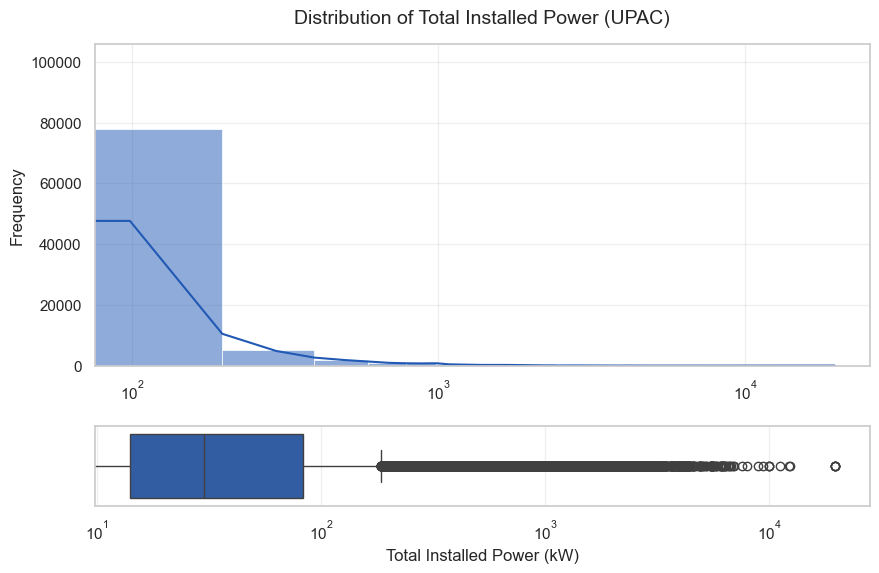

In [8]:
sns.set(style='whitegrid')
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1], hspace=0.30)

# --- HISTOGRAM ---
ax0 = plt.subplot(gs[0])
sns.histplot(
    df['Total installed power (kW)'],
    bins=100,
    color='#2159B4',
    kde=True,
    ax=ax0
)
ax0.set_xscale('log')
ax0.set_title('Distribution of Total Installed Power (UPAC)', fontsize=14, pad=15)
ax0.set_xlabel('')
ax0.set_ylabel('Frequency')
ax0.grid(alpha=0.3)

# --- BOXPLOT ---
ax1 = plt.subplot(gs[1])
sns.boxplot(
    x=df['Total installed power (kW)'],
    color='#2159B4',
    ax=ax1
)
ax1.set_xscale('log')
ax1.set_xlabel('Total Installed Power (kW)')
ax1.set_yticks([])
ax1.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


The histogram shows the frequency of installations across different power ranges, while the boxplot highlights the median, quartiles, and the presence of outliers. 

> **Note:** For descriptive reporting, we retain the original scale (kW), while for visualization, the log scale is used to handle the wide range of values effectively.

**Distribution of Total Installed Power (Log-transformed)**

To better visualize the highly skewed distribution of *'Total Installed Power (kW)'*, we applied a *log10 transformation*:



In [ ]:
# Transform Total Installed Power using log10
df['LogPower'] = np.log10(df['Total installed power (kW)'] + 1e-3)  # add small epsilon to avoid log(0)

The log transformation compresses the extreme high values, bringing them closer to the rest of the data, while preserving the relative differences. This makes the histogram and boxplot more interpretable, especially for a dataset with very skewed values and large outliers.

C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\64829276.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\64829276.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\64829276.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


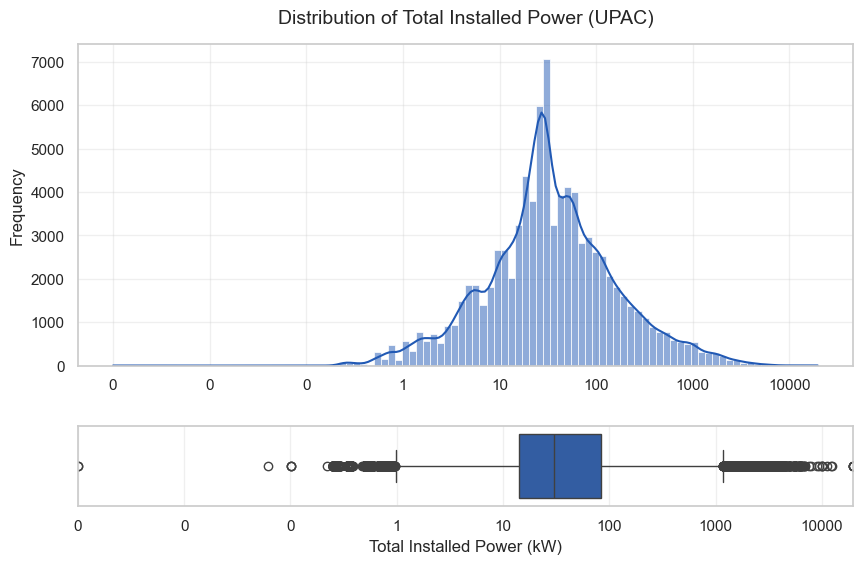

In [ ]:
sns.set(style='whitegrid')

# Determine min/max for axis scaling (optional, for consistency)
x_min = df['LogPower'].min()
x_max = df['LogPower'].max()

# Create figure
fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(2, 1, height_ratios=[4, 1], hspace=0.30)

# --- HISTOGRAM ---
ax0 = plt.subplot(gs[0])
sns.histplot(
    data=df,
    x='LogPower',
    bins=100,
    color='#2159B4',
    kde=True,
    ax=ax0
)
ax0.set_title('Distribution of Total Installed Power (UPAC)', fontsize=14, pad=15)
ax0.set_xlabel('')
ax0.set_ylabel('Frequency')

# Convert ticks back to original scale for readability
ticks = ax0.get_xticks()
ax0.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
ax0.grid(alpha=0.3)

# --- BOXPLOT ---
ax1 = plt.subplot(gs[1])
sns.boxplot(
    data=df,
    x='LogPower',
    color='#2159B4',
    ax=ax1
)
ax1.set_xlabel('Total Installed Power (kW)')
ax1.set_yticks([])

# Match x-axis to histogram and convert ticks back to original scale
ax1.set_xlim(x_min, x_max)
ticks = ax1.get_xticks()
ax1.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
ax1.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


This transformation reduces the effect of extreme outliers and makes the distribution more symmetric, allowing us to clearly see patterns in the majority of data points.

**Distribution of *'Total Installed Power'* by *'Voltage Level'***

Since total installed power (kW) depends on the voltage level, we examined the descriptive statistics by voltage category:

In [29]:
# Descriptive statistics by Voltage Level
df.groupby('Voltage level')['Total installed power (kW)'].describe()


,count,mean,std,min,25%,50%,75%,max
Voltage level,,,,,,,,
AT,266.0,1563.486165,2837.663733,17.00,805.00,988.52,999.5800,19600.00
BTE,16071.0,55.714848,71.548670,0.25,20.00,30.00,60.0000,1245.00
BTN,55768.0,60.389131,117.407470,0.00,9.83,25.72,61.9625,3446.22
MT,16406.0,373.730979,705.932260,0.25,29.16,92.25,400.2500,12460.74


From the table, we can see substantial differences between voltage levels:

- **AT** (High Voltage) has the highest average power (~1,563 kW) and extreme maximum values (~19,600 kW).

- **MT** (Medium Voltage) also has high mean values (~374 kW), but lower than AT.

- **BTN** and **BTE** (Low Voltage levels) have much lower average installed power (~60 kW and ~56 kW, respectively).

To better visualize these differences and account for the wide range of values, we applied a log10 transformation and plotted histograms with overlaid boxplots for each voltage level.

C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\1667742792.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hist.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\1667742792.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\1667742792.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hist.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\1667742792.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels([

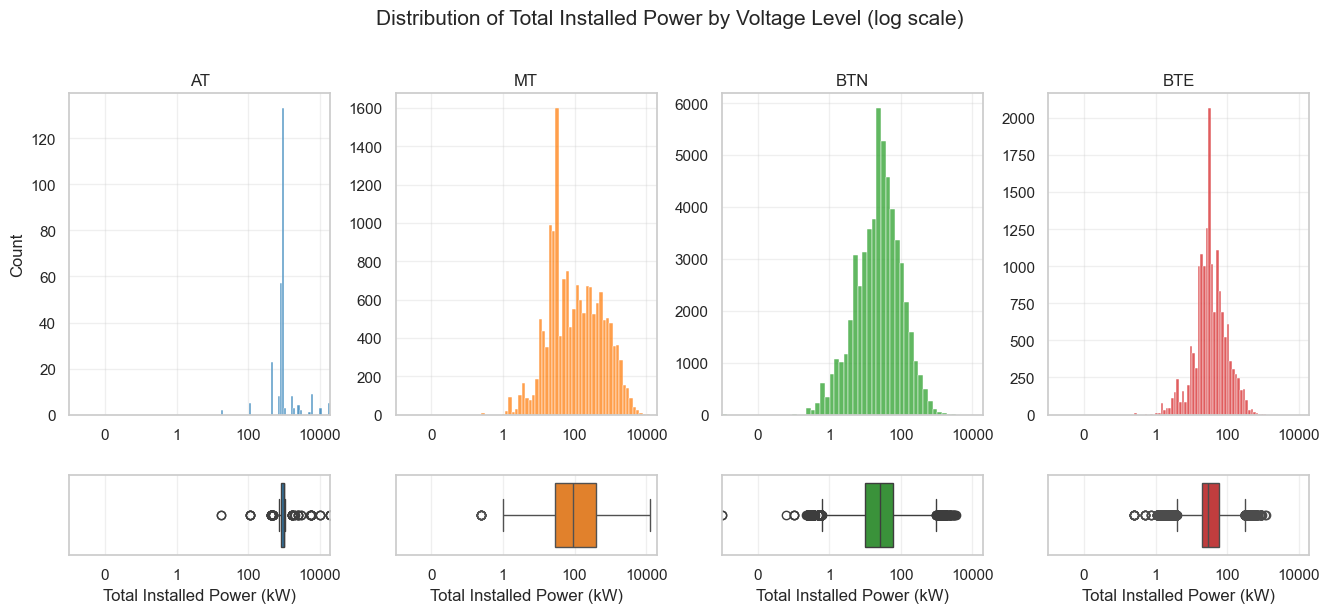

In [30]:
sns.set(style='whitegrid')

# Color palette for Voltage levels
palette = {'AT': '#1f77b4', 'MT': '#ff7f0e', 'BTN': '#2ca02c', 'BTE': '#d62728'}

# Desired order of Voltage levels
voltage_levels = ['AT', 'MT', 'BTN', 'BTE']
n_cols = len(voltage_levels)

# Determine global min/max for log-transformed x-axis
x_min = df['LogPower'].min()
x_max = df['LogPower'].max()

# Create figure with gridspec
fig = plt.figure(figsize=(4 * n_cols, 6))
gs = fig.add_gridspec(2, n_cols, height_ratios=[4, 1], hspace=0.3, wspace=0.25)

for i, voltage in enumerate(voltage_levels):
    subset = df[df['Voltage level'] == voltage]
    
    # --- HISTOGRAM ---
    ax_hist = fig.add_subplot(gs[0, i])
    sns.histplot(
        data=subset,
        x='LogPower',
        bins=50,
        color=palette[voltage],
        kde=False,
        ax=ax_hist
    )
    ax_hist.set_title(voltage, fontsize=12)
    ax_hist.set_xlabel('')
    ax_hist.set_ylabel('Count' if i == 0 else '')
    ax_hist.set_xlim(x_min, x_max)
    
    # Convert log-ticks back to original scale
    ticks = ax_hist.get_xticks()
    ax_hist.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
    ax_hist.grid(alpha=0.3, which='both')

    # --- BOX PLOT ---
    ax_box = fig.add_subplot(gs[1, i])
    sns.boxplot(
        data=subset,
        x='LogPower',
        color=palette[voltage],
        ax=ax_box
    )
    ax_box.set_xlabel('Total Installed Power (kW)')
    ax_box.set_yticks([])
    ax_box.set_xlim(x_min, x_max)
    
    # Convert log-ticks back to original scale for boxplot
    ticks = ax_box.get_xticks()
    ax_box.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
    ax_box.grid(alpha=0.3, axis='x')

plt.suptitle('Distribution of Total Installed Power by Voltage Level (log scale)', fontsize=15, y=1.02)
plt.tight_layout()
plt.show()


**Distribution of Total Installed Power by Voltage Level and Season**

Since the total installed power depends on the voltage level, we performed a detailed analysis by Voltage Level (AT, MT, BTN, BTE) and Season (Winter and Summer).


In [31]:
# Descriptive statistics by Voltage Level and Season (original scale)
desc_stats = df.groupby(['Season', 'Voltage level'])['Total installed power (kW)'].describe()
print(desc_stats)

                        count         mean          std     min     25%  \
Season Voltage level                                                      
Summer AT               141.0  1608.186383  2993.825907   17.00  800.00   
       BTE             8581.0    57.384653    74.974862    0.25   20.00   
       BTN            29246.0    63.938838   123.227729    0.06   10.00   
       MT              8850.0   382.765116   731.250906    0.25   29.63   
Winter AT               125.0  1513.064320  2661.630397  115.00  830.00   
       BTE             7490.0    53.801818    67.363854    0.25   20.00   
       BTN            26522.0    56.474842   110.505222    0.00    8.90   
       MT              7556.0   363.149704   674.965809    0.25   28.44   

                          50%       75%       max  
Season Voltage level                               
Summer AT             992.040  999.5800  19600.00  
       BTE             30.000   60.0000   1245.00  
       BTN             27.345   67.0950  

Key observations:

- **AT** (High Voltage) shows the highest mean power (~1,500–1,600 kW) and extreme maximum values (~19,600 kW), reflecting large installations.

- **MT** (Medium Voltage) also has high mean values (~360–380 kW), but lower than AT.

- **BTN** and **BTE** (Low Voltage) have much lower mean installed power (~55–64 kW).

**Crucially**, differences between Winter and Summer seem minimal for most voltage levels, except for slight variations in AT and MT due to seasonal installations or operational patterns.


We visualized the distributions using log-transformed histograms and boxplots, which confirm these patterns:

- Heavy skew and long tails for AT and MT.

- Concentrated low values for BTN and BTE.

- Seasonal shifts seem minor except in high-voltage levels.

C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\170550754.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hist.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\170550754.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\170550754.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hist.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\170550754.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels([f"{1

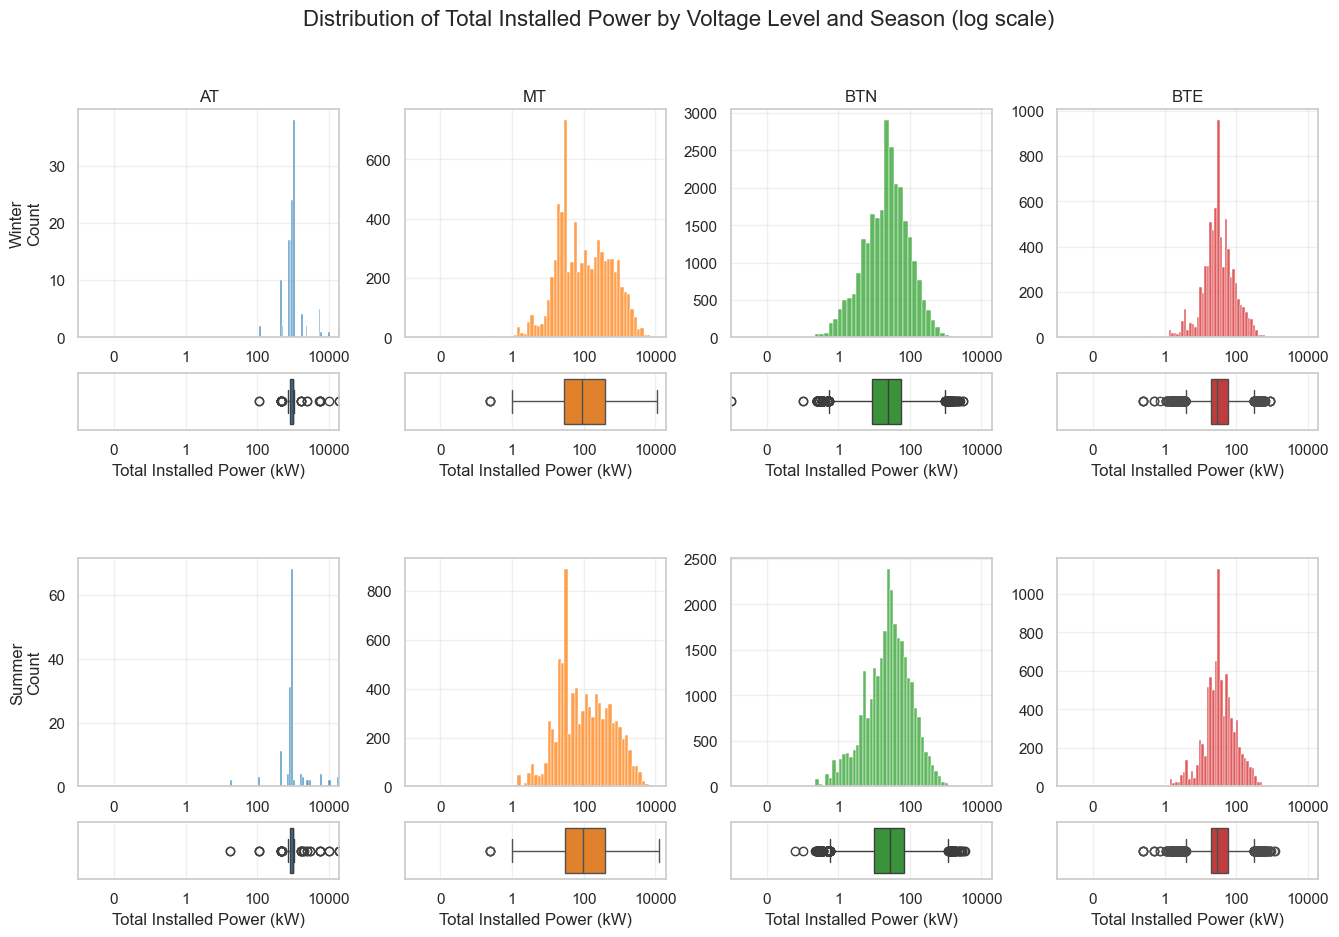

In [ ]:
sns.set(style='whitegrid')

# Ensure columns exist
df['Year'] = df['Quarter'].str[:4]

# Color palette for voltage levels
palette = {'AT': '#1f77b4', 'MT': '#ff7f0e', 'BTN': '#2ca02c', 'BTE': '#d62728'}

# Order of categories
voltage_levels = ['AT', 'MT', 'BTN', 'BTE']
seasons = ['Winter', 'Summer']

# Global scale (log)
x_min = df['LogPower'].min()
x_max = df['LogPower'].max()

# Figure setup: 4 columns (voltage) × 2 rows (seasons)
fig = plt.figure(figsize=(4 * len(voltage_levels), 10))
outer_gs = fig.add_gridspec(2, len(voltage_levels), hspace=0.4, wspace=0.25)

# Loop through each Season (row) and Voltage level (column)
for row, season in enumerate(seasons):
    subset_season = df[df['Season'] == season]
    
    for col, voltage in enumerate(voltage_levels):
        subset = subset_season[subset_season['Voltage level'] == voltage]
        
        # Inner gridspec for histogram + boxplot (stacked vertically)
        inner_gs = outer_gs[row, col].subgridspec(2, 1, height_ratios=[4, 1], hspace=0.25)
        
        # --- HISTOGRAM ---
        ax_hist = fig.add_subplot(inner_gs[0])
        sns.histplot(
            data=subset,
            x='LogPower',
            bins=50,
            color=palette[voltage],
            kde=False,
            ax=ax_hist
        )
        if row == 0:
            ax_hist.set_title(voltage, fontsize=12)
        if col == 0:
            ax_hist.set_ylabel(f'{season}\nCount')
        else:
            ax_hist.set_ylabel('')
        ax_hist.set_xlabel('')
        ax_hist.set_xlim(x_min, x_max)
        ticks = ax_hist.get_xticks()
        ax_hist.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
        ax_hist.grid(alpha=0.3)

        # --- BOX PLOT ---
        ax_box = fig.add_subplot(inner_gs[1])
        sns.boxplot(
            data=subset,
            x='LogPower',
            color=palette[voltage],
            ax=ax_box
        )
        ax_box.set_xlabel('Total Installed Power (kW)')
        ax_box.set_yticks([])
        ax_box.set_xlim(x_min, x_max)
        ticks = ax_box.get_xticks()
        ax_box.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
        ax_box.grid(alpha=0.3, axis='x')

# Global title
plt.suptitle('Distribution of Total Installed Power by Voltage Level and Season (log scale)', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()


### Number of Installations

Next, we will perform a similar descriptive analysis and visualization for the variable Number of Installations, starting by examining its basic descriptive statistics:

In [32]:
# Descriptive statistics for Number of Installations
df['Number of installations'].describe()


count    88511.000000
mean        17.484414
std         58.117527
min          1.000000
25%          1.000000
50%          2.000000
75%          8.000000
max       2118.000000
Name: Number of installations, dtype: float64

- The mean number of installations is approximately 17.5, but the standard deviation is quite large (58.1), indicating a wide dispersion.

- Most installations are small: the median is only 2, and the 25th percentile is 1, while the 75th percentile is 8.

- The maximum number of installations reaches 2118, showing the presence of a few very large values.

These statistics highlight that the distribution is highly skewed, with a majority of small values and a few extreme outliers. This motivates the use of log-transformed visualizations to better understand the spread of the data.

C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\124698805.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax0.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\124698805.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\124698805.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


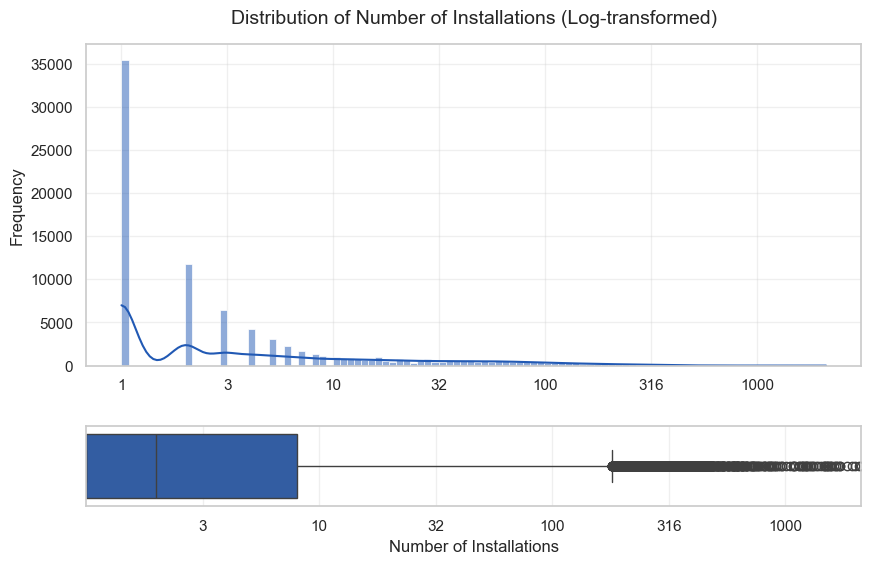

In [34]:
sns.set(style='whitegrid')

# Log-transform Number of Installations (add small epsilon to avoid log(0))
df['LogInstallations'] = np.log10(df['Number of installations'] + 1e-3)

# Determine min/max for axis scaling
x_min = df['LogInstallations'].min()
x_max = df['LogInstallations'].max()

# Create figure
fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1], hspace=0.30)

# --- HISTOGRAM ---
ax0 = plt.subplot(gs[0])
sns.histplot(
    data=df,
    x='LogInstallations',
    bins=100,
    color='#2159B4',
    kde=True,
    ax=ax0
)
ax0.set_title('Distribution of Number of Installations (Log-transformed)', fontsize=14, pad=15)
ax0.set_xlabel('')
ax0.set_ylabel('Frequency')

# Convert ticks back to original scale for readability
ticks = ax0.get_xticks()
ax0.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
ax0.grid(alpha=0.3)

# --- BOXPLOT ---
ax1 = plt.subplot(gs[1])
sns.boxplot(
    data=df,
    x='LogInstallations',
    color='#2159B4',
    ax=ax1
)
ax1.set_xlabel('Number of Installations')
ax1.set_yticks([])

# Match x-axis to histogram and convert ticks back to original scale
ax1.set_xlim(x_min, x_max)
ticks = ax1.get_xticks()
ax1.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
ax1.grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()


After applying the log-transformation, the histogram and boxplot reveal the underlying distribution more clearly. Most installations are small in number, but a few facilities have a very high number of installations, which would be hard to visualize on a linear scale.

**Distribution of Number of Installtions by Voltage Level**

To better understand how the *'Number of Installations'* varies across different Voltage Levels, we first computed descriptive statistics:



In [35]:
# Descriptive statistics for 'Number of Installations' by Voltage Level
desc_stats_installations = df.groupby('Voltage level')['Number of installations'].describe()
print(desc_stats_installations)


                 count       mean        std  min  25%  50%   75%     max
Voltage level                                                            
AT               266.0   1.041353   0.199482  1.0  1.0  1.0   1.0     2.0
BTE            16071.0   1.678800   1.373542  1.0  1.0  1.0   2.0    19.0
BTN            55768.0  26.588474  71.650917  1.0  1.0  5.0  20.0  2118.0
MT             16406.0   2.286968   2.786708  1.0  1.0  1.0   2.0    58.0


- **AT** (High Voltage): Very few installations, mostly 1 per unit, with a maximum of 2.

- **MT** (Medium Voltage): Low number of installations, median = 1, maximum = 58.

- **BTN** (Low Voltage): Largest number of installations, highly skewed distribution with some extreme outliers (max = 2118).

- **BTE** (Low Voltage): Mostly small numbers of installations, median = 1, maximum = 19.

These statistics highlight a highly skewed distribution, especially for BTN, where a few units account for a disproportionately large number of installations.

C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\1973839983.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hist.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\1973839983.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\1973839983.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hist.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\1973839983.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels([

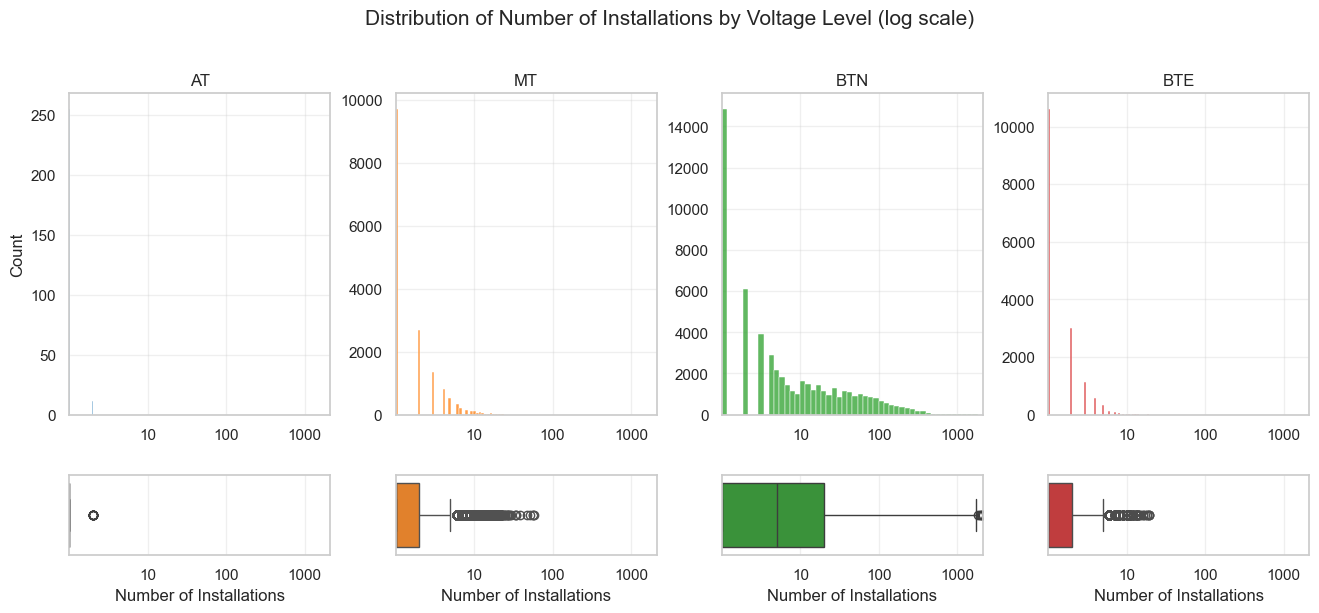

In [36]:
sns.set(style='whitegrid')

# Color palette for Voltage levels
palette = {'AT': '#1f77b4', 'MT': '#ff7f0e', 'BTN': '#2ca02c', 'BTE': '#d62728'}
voltage_levels = ['AT', 'MT', 'BTN', 'BTE']
n_cols = len(voltage_levels)

# Determine global min/max for consistent axis scaling
x_min = df['LogInstallations'].min()
x_max = df['LogInstallations'].max()

# Create figure with gridspec
fig = plt.figure(figsize=(4 * n_cols, 6))
gs = fig.add_gridspec(2, n_cols, height_ratios=[4, 1], hspace=0.3, wspace=0.25)

for i, voltage in enumerate(voltage_levels):
    subset = df[df['Voltage level'] == voltage]
    
    # --- HISTOGRAM ---
    ax_hist = fig.add_subplot(gs[0, i])
    sns.histplot(
        data=subset,
        x='LogInstallations',
        bins=50,
        color=palette[voltage],
        kde=False,
        ax=ax_hist
    )
    ax_hist.set_title(voltage, fontsize=12)
    ax_hist.set_xlabel('')
    ax_hist.set_ylabel('Count' if i == 0 else '')
    ax_hist.set_xlim(x_min, x_max)
    
    # Convert log-ticks back to original scale
    ticks = ax_hist.get_xticks()
    ax_hist.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
    ax_hist.grid(alpha=0.3, which='both')

    # --- BOX PLOT ---
    ax_box = fig.add_subplot(gs[1, i])
    sns.boxplot(
        data=subset,
        x='LogInstallations',
        color=palette[voltage],
        ax=ax_box
    )
    ax_box.set_xlabel('Number of Installations')
    ax_box.set_yticks([])
    ax_box.set_xlim(x_min, x_max)
    
    ticks = ax_box.get_xticks()
    ax_box.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
    ax_box.grid(alpha=0.3, axis='x')

plt.suptitle('Distribution of Number of Installations by Voltage Level (log scale)', fontsize=15, y=1.02)
plt.tight_layout()
plt.show()


From the plots:

- BTN clearly shows the widest range of installations.

- AT, MT, and BTE have distributions concentrated at very low values.



**Distribution of Number of Installtions by Voltage Level and Season**

In [37]:
# Descriptive statistics for Number of Installations by Voltage Level and Season
desc_stats_installations_season = df.groupby(['Season', 'Voltage level'])['Number of installations'].describe()
print(desc_stats_installations_season)


                        count       mean        std  min  25%  50%   75%  \
Season Voltage level                                                       
Summer AT               141.0   1.042553   0.202567  1.0  1.0  1.0   1.0   
       BTE             8581.0   1.704114   1.423322  1.0  1.0  1.0   2.0   
       BTN            29246.0  27.212234  73.111083  1.0  1.0  5.0  21.0   
       MT              8850.0   2.314689   2.865237  1.0  1.0  1.0   2.0   
Winter AT               125.0   1.040000   0.196748  1.0  1.0  1.0   1.0   
       BTE             7490.0   1.649800   1.313692  1.0  1.0  1.0   2.0   
       BTN            26522.0  25.900649  70.000415  1.0  1.0  4.0  20.0   
       MT              7556.0   2.254500   2.691644  1.0  1.0  1.0   2.0   

                         max  
Season Voltage level          
Summer AT                2.0  
       BTE              19.0  
       BTN            2118.0  
       MT               58.0  
Winter AT                2.0  
       BTE            

The summary statistics reveal the following patterns:

- AT (High Voltage) consistently has the smallest number of installations, with most entries equal to 1, and a maximum of 2 installations.

- MT (Medium Voltage) also shows very low installation counts, generally around 1–2, with occasional higher values up to 58.

- BTE (Low Voltage, small transformers) has slightly higher numbers than AT and MT, but still relatively low on average (~1.65–1.70).

- BTN (Low Voltage, larger transformers) displays the most variability, with a wide range of installation counts. Most installations are small, but there are extreme values reaching over 2000 installations in some cases.

Differences between Winter and Summer seem minor across all voltage levels, with only small variations in mean values.

C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\3827618004.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hist.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\3827618004.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\3827618004.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hist.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\3827618004.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels([

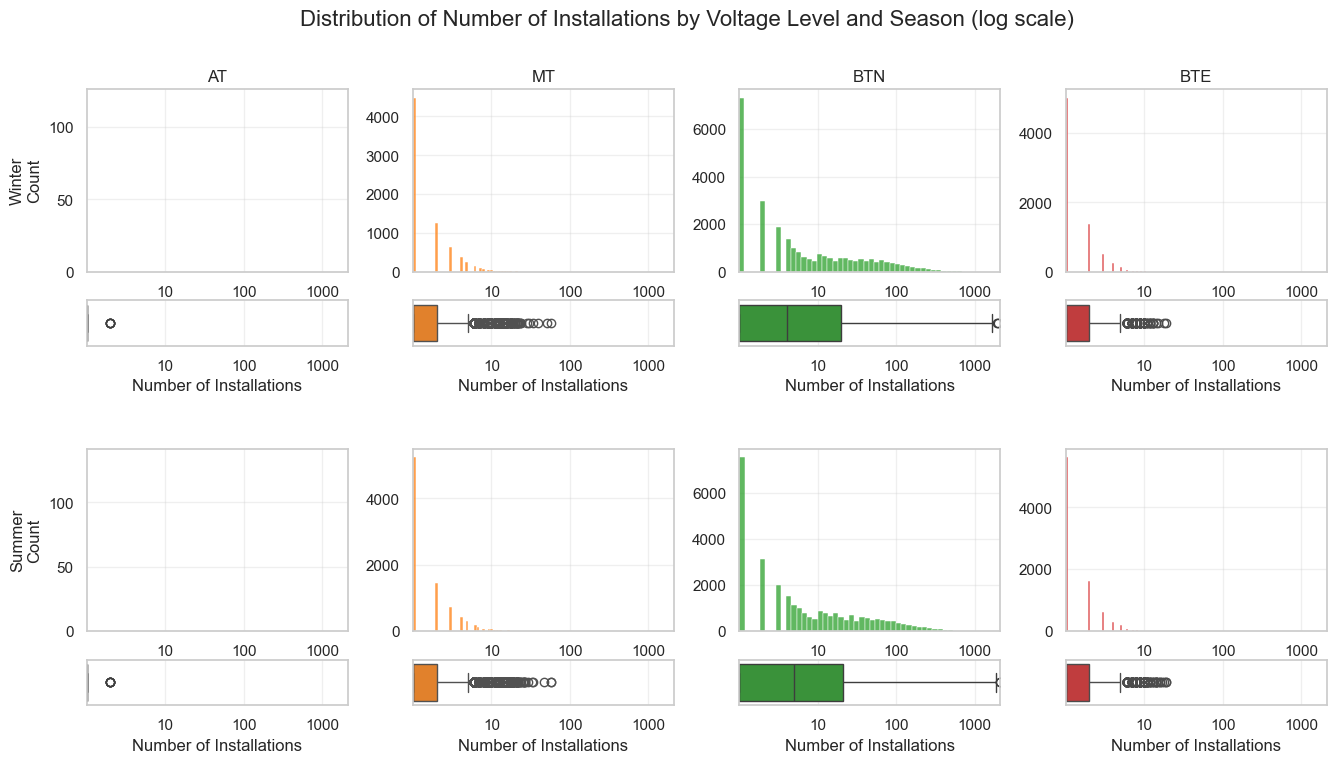

In [43]:
sns.set(style='whitegrid')

# Color palette for voltage levels
palette = {'AT': '#1f77b4', 'MT': '#ff7f0e', 'BTN': '#2ca02c', 'BTE': '#d62728'}

voltage_levels = ['AT', 'MT', 'BTN', 'BTE']
seasons = ['Winter', 'Summer']

# Global min/max for consistent x-axis
x_min = df['LogInstallations'].min()
x_max = df['LogInstallations'].max()

# Figure setup: 4 columns (voltage) × 2 rows (seasons)
fig = plt.figure(figsize=(4 * len(voltage_levels), 8))
outer_gs = fig.add_gridspec(2, len(voltage_levels), hspace=0.4, wspace=0.25)

for row, season in enumerate(seasons):
    subset_season = df[df['Season'] == season]
    
    for col, voltage in enumerate(voltage_levels):
        subset = subset_season[subset_season['Voltage level'] == voltage]
        
        # Inner gridspec for histogram + boxplot
        inner_gs = outer_gs[row, col].subgridspec(2, 1, height_ratios=[4, 1], hspace=0.25)
        
        # --- HISTOGRAM ---
        ax_hist = fig.add_subplot(inner_gs[0])
        sns.histplot(
            data=subset,
            x='LogInstallations',
            bins=50,
            color=palette[voltage],
            kde=False,
            ax=ax_hist
        )
        if row == 0:
            ax_hist.set_title(voltage, fontsize=12)
        if col == 0:
            ax_hist.set_ylabel(f'{season}\nCount')
        else:
            ax_hist.set_ylabel('')
        ax_hist.set_xlabel('')
        ax_hist.set_xlim(x_min, x_max)
        ticks = ax_hist.get_xticks()
        ax_hist.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
        ax_hist.grid(alpha=0.3)

        # --- BOX PLOT ---
        ax_box = fig.add_subplot(inner_gs[1])
        sns.boxplot(
            data=subset,
            x='LogInstallations',
            color=palette[voltage],
            ax=ax_box
        )
        ax_box.set_xlabel('Number of Installations')
        ax_box.set_yticks([])
        ax_box.set_xlim(x_min, x_max)
        ticks = ax_box.get_xticks()
        ax_box.set_xticklabels([f"{10**tick:.0f}" for tick in ticks])
        ax_box.grid(alpha=0.3, axis='x')

# Global title
plt.suptitle('Distribution of Number of Installations by Voltage Level and Season (log scale)', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()


### District Voltage Percentages

To understand how different voltage levels are distributed across districts, we first aggregated the data by district. Since the original dataset contains multiple entries per district (due to subdivisions like parishes or municipalities), we calculated the mean percentage of each voltage level per district. This ensures that each district is represented only once, avoiding overrepresentation of districts with more subdivisions.

In [40]:
# Group by District, summing o que é necessário
district_df = df.groupby('District', as_index=False)[
    ['District_High_Voltage_AT(%)',
     'District_Medium_Voltage_MT(%)',
     'District_Low_Voltage_BTN(%)',
     'District_Low_Voltage_BTE(%)']
].mean()  # ou sum se fizer sentido, mas mean é provavelmente melhor aqui


Next, we computed descriptive statistics for each voltage level percentage to summarize the distribution across districts:

In [ ]:
desc_stats_voltage_pct = district_df.describe().T  # transpor para ficar mais legível
print(desc_stats_voltage_pct)

                               count       mean       std        min  \
District_High_Voltage_AT(%)     18.0   0.016133  0.018568   0.000000   
District_Medium_Voltage_MT(%)   18.0   2.508771  0.929390   1.094651   
District_Low_Voltage_BTN(%)     18.0  95.501377  1.635628  91.012568   
District_Low_Voltage_BTE(%)     18.0   1.973720  0.913082   0.926764   

                                     25%        50%        75%        max  
District_High_Voltage_AT(%)     0.001116   0.009362   0.019246   0.062242  
District_Medium_Voltage_MT(%)   1.756082   2.512393   2.968446   4.320612  
District_Low_Voltage_BTN(%)    94.683567  95.757237  96.353797  97.959345  
District_Low_Voltage_BTE(%)     1.277997   1.809953   2.273661   4.647572  


The percentages of installations per voltage level across districts reveal a clear dominance of low-voltage installations (BTN):

- BTN (Low Voltage): Most districts have ~95% of installations in this category.

- BTE (Low Voltage – secondary): Minor contribution (~2%), with slight variation across districts.

- MT (Medium Voltage): Small fraction (~2–3%), indicating areas with slightly higher demand.

- AT (High Voltage): Very rare (~1–2% on average), concentrated in a few districts – likely the most industrialized or high-demand areas.

**Key insight:**

- Most districts are dominated by residential or low-demand installations.

- A few districts stand out with higher percentages of AT and MT, highlighting potential industrial or commercial hubs.

C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\1514671363.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hist.set_xticklabels([f"{10**tick:.1f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\1514671363.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels([f"{10**tick:.1f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\1514671363.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_hist.set_xticklabels([f"{10**tick:.1f}" for tick in ticks])
C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\1514671363.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_box.set_xticklabels([

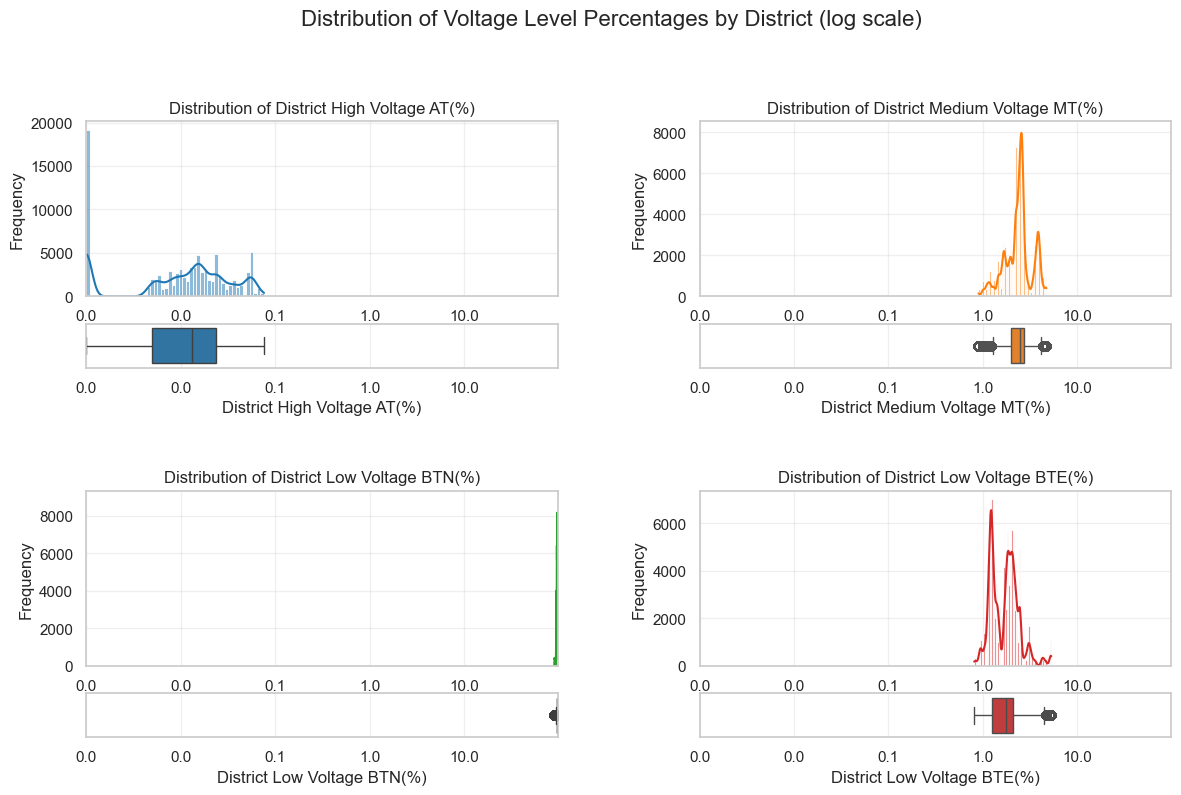

In [ ]:
sns.set(style='whitegrid')

# Voltage percentage variables by district
variables = [
    'District_High_Voltage_AT(%)',
    'District_Medium_Voltage_MT(%)',
    'District_Low_Voltage_BTN(%)',
    'District_Low_Voltage_BTE(%)'
]

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Log-transform for better visualization (add small epsilon to avoid log(0))
for var in variables:
    df[f'Log_{var}'] = np.log10(df[var] + 1e-3)

# Global min/max for consistent axes
x_min = df[[f'Log_{var}' for var in variables]].min().min()
x_max = df[[f'Log_{var}' for var in variables]].max().max()

# Create figure with 2x2 subplots
fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(2, 2, hspace=0.5, wspace=0.3)

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    log_var = f'Log_{var}'

    # Inner gridspec for histogram + boxplot
    inner_gs = gs[row, col].subgridspec(2, 1, height_ratios=[4, 1], hspace=0.25)

    # --- HISTOGRAM ---
    ax_hist = fig.add_subplot(inner_gs[0])
    sns.histplot(
        data=df,
        x=log_var,
        bins=50,
        color=colors[i],
        kde=True,
        ax=ax_hist
    )
    ax_hist.set_title(f'Distribution of {var.replace("_", " ")}', fontsize=12)
    ax_hist.set_xlabel('')
    ax_hist.set_ylabel('Frequency')
    ax_hist.set_xlim(x_min, x_max)

    # Convert log ticks back to original scale
    ticks = ax_hist.get_xticks()
    ax_hist.set_xticklabels([f"{10**tick:.1f}" for tick in ticks])
    ax_hist.grid(alpha=0.3, which='both')

    # --- BOXPLOT ---
    ax_box = fig.add_subplot(inner_gs[1])
    sns.boxplot(
        data=df,
        x=log_var,
        color=colors[i],
        ax=ax_box
    )
    ax_box.set_xlabel(var.replace("_", " "))
    ax_box.set_yticks([])
    ax_box.set_xlim(x_min, x_max)

    # Convert log ticks back to original scale
    ticks = ax_box.get_xticks()
    ax_box.set_xticklabels([f"{10**tick:.1f}" for tick in ticks])
    ax_box.grid(alpha=0.3, axis='x')

plt.suptitle('Distribution of Voltage Level Percentages by District (log scale)', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


These variables represent the proportion of installations per voltage level within each district. Since they are already normalized, performing separate analyses by voltage level or season is not meaningful — the percentages already capture the internal distribution of each voltage type.




### Relationship Between Total Installed Power and Number of Installations by Voltage Level

We start by exploring the overall relationship between Total Installed Power and Number of Installations.

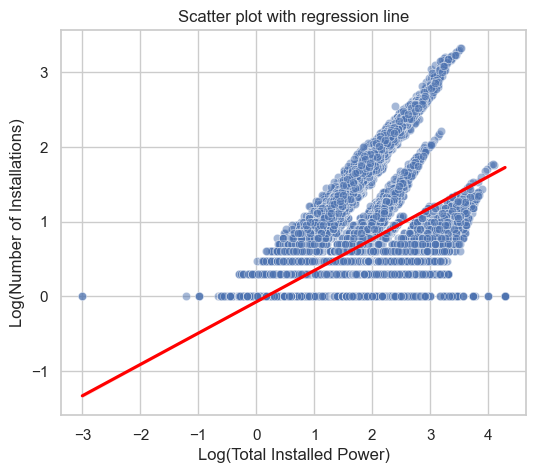

In [54]:
sns.set(style='whitegrid')
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='LogPower',
    y='LogInstallations',
    data=df,
    alpha=0.5
)
sns.regplot(
    x='LogPower',
    y='LogInstallations',
    data=df,
    scatter=False,
    color='red'
)
plt.xlabel('Log(Total Installed Power)')
plt.ylabel('Log(Number of Installations)')
plt.title('Scatter plot with regression line')
plt.show()


When we plot Log(Total Installed Power) against Log(Number of Installations) without distinguishing voltage levels, the scatter plot shows a general positive trend but also suggests the presence of distinct clusters. These clusters appear as roughly vertical “stripes” along the x-axis, indicating that different Voltage Levels may be driving separate groups of points.

This observation motivates a second visualization in which points are colored according to Voltage Level, allowing us to confirm whether the clusters correspond to different voltage categories and to better understand the relationship within each group.

AT regression: Intercept = -0.040, Slope = 0.018
MT regression: Intercept = -0.398, Slope = 0.304
BTN regression: Intercept = -0.323, Slope = 0.811
BTE regression: Intercept = -0.322, Slope = 0.307


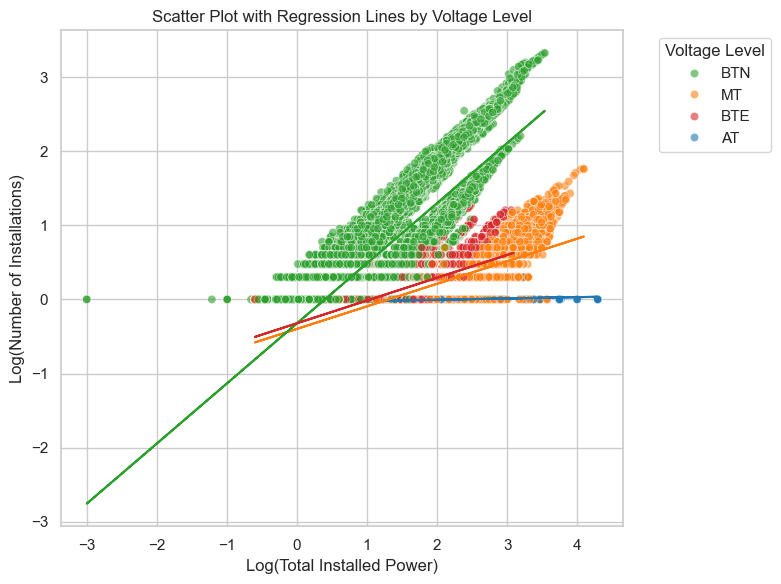

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))

palette = {'AT': '#1f77b4', 'MT': '#ff7f0e', 'BTN': '#2ca02c', 'BTE': '#d62728'}

# Scatter plot
scatter = sns.scatterplot(
    x='LogPower',
    y='LogInstallations',
    hue='Voltage level',
    data=df,
    palette=palette,
    alpha=0.6
)

# Regression lines and coefficients
for voltage, color in palette.items():
    subset = df[df['Voltage level'] == voltage]
    X = sm.add_constant(subset['LogPower'])
    y = subset['LogInstallations']
    model = sm.OLS(y, X).fit()
    a, b = model.params
    print(f"{voltage} regression: Intercept = {a:.3f}, Slope = {b:.3f}")
    
    # Plot regression line (without label)
    x_vals = subset['LogPower']
    y_vals = a + b * x_vals
    plt.plot(x_vals, y_vals, color=color)

plt.xlabel('Log(Total Installed Power)')
plt.ylabel('Log(Number of Installations)')
plt.title('Scatter Plot with Regression Lines by Voltage Level')

# Move legend outside
plt.legend(title='Voltage Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This visualization confirms that the apparent clusters in the overall plot are indeed due to different Voltage Levels. 

The regression coefficients highlight distinct patterns:

- AT (High Voltage) installations show almost no increase in the number of installations with increasing power, indicating very few, large installations; 

- MT (Medium Voltage) and BTE (Low Voltage) exhibit moderate positive relationships; 

- BTN (Low Voltage) shows a strong positive relationship, meaning that as total installed power increases, the number of installations grows significantly. 

These results confirm that Voltage Level might be a key factor influencing both the total installed power and the number of installations, and analyzing the data without accounting for voltage would mask these differences.

### Annual Trends of Total Installed Power and Number of Installations by Voltage Level

The stacked area charts show the evolution of Total Installed Power and Number of Installations from 2023 to 2024, broken down by voltage level.

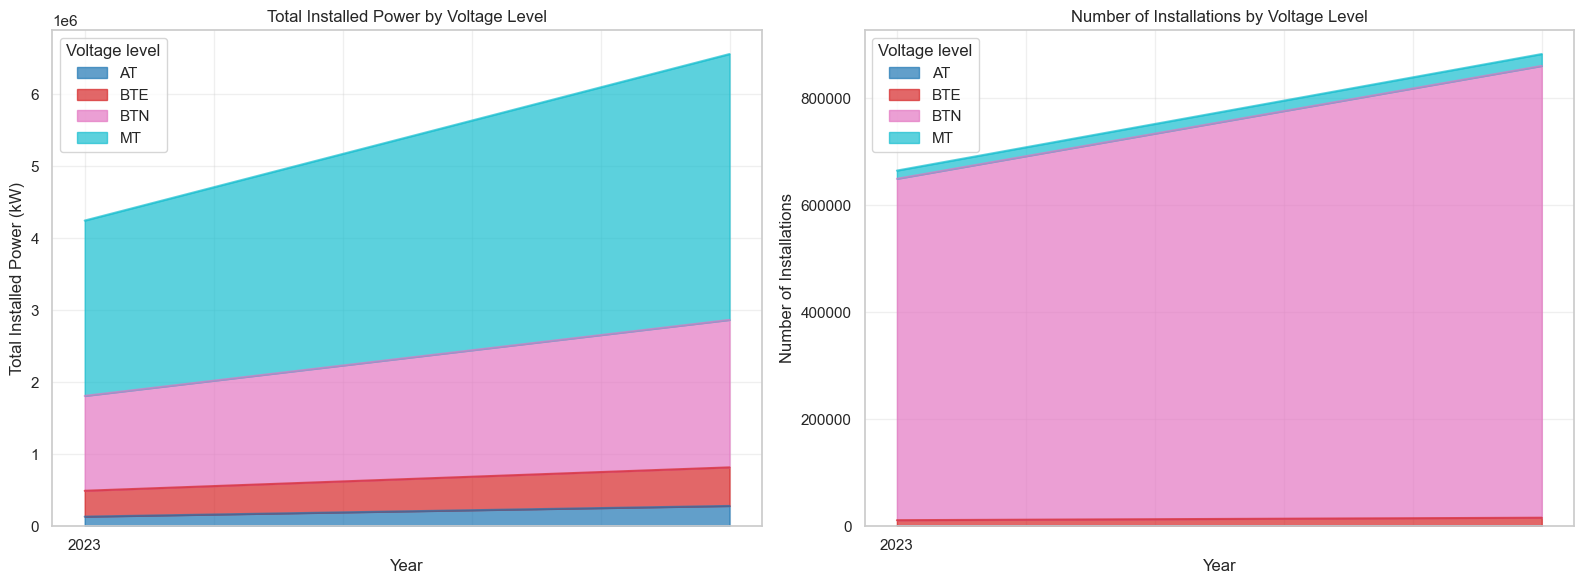

In [67]:
df['Year'] = df['Quarter'].str[:4]

# Agregar por Year e Voltage Level, somando Total Installed Power e Number of Installations
annual_summary = df.groupby(['Year', 'Voltage level'], as_index=False).agg({
    'Total installed power (kW)': 'sum',
    'Number of installations': 'sum'
})

# Paleta de cores consistente
palette = {'AT': '#1f77b4', 'MT': '#ff7f0e', 'BTN': '#2ca02c', 'BTE': '#d62728'}


# Pivot tables para cada variável
power_pivot = annual_summary.pivot(index='Year', columns='Voltage level', values='Total installed power (kW)')
installations_pivot = annual_summary.pivot(index='Year', columns='Voltage level', values='Number of installations')

# Configuração da figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# --- Total Installed Power ---
power_pivot.plot(kind='area', stacked=True, ax=axes[0], colormap='tab10', alpha=0.7)
axes[0].set_title('Total Installed Power by Voltage Level')
axes[0].set_ylabel('Total Installed Power (kW)')
axes[0].set_xlabel('Year')
axes[0].grid(alpha=0.3)

# --- Number of Installations ---
installations_pivot.plot(kind='area', stacked=True, ax=axes[1], colormap='tab10', alpha=0.7)
axes[1].set_title('Number of Installations by Voltage Level')
axes[1].set_ylabel('Number of Installations')
axes[1].set_xlabel('Year')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [68]:
# Total Installed Power por ano
print("Total Installed Power per Year by Voltage Level:")
print(power_pivot)

# Número de Instalações por ano
print("\nNumber of Installations per Year by Voltage Level:")
print(installations_pivot)

# Crescimento anual percentual (ano a ano)
power_growth = power_pivot.pct_change().fillna(0) * 100
installations_growth = installations_pivot.pct_change().fillna(0) * 100

print("\nAnnual growth (%) - Total Installed Power:")
print(power_growth)

print("\nAnnual growth (%) - Number of Installations:")
print(installations_growth)


Total Installed Power per Year by Voltage Level:
Voltage level         AT        BTE         BTN          MT
Year                                                       
2023           133493.04  359572.66  1318234.53  2436793.24
2024           282394.28  535820.67  2049546.51  3694637.20

Number of Installations per Year by Voltage Level:
Voltage level   AT    BTE     BTN     MT
Year                                    
2023           110  11201  638215  15308
2024           167  15779  844571  22212

Annual growth (%) - Total Installed Power:
Voltage level          AT        BTE        BTN         MT
Year                                                      
2023             0.000000   0.000000   0.000000   0.000000
2024           111.542325  49.015965  55.476621  51.618822

Annual growth (%) - Number of Installations:
Voltage level         AT        BTE        BTN         MT
Year                                                     
2023            0.000000   0.000000   0.000000   0.00

Total Installed Power seems to have grown significantly across all voltage levels in 2024 compared to 2023:

- AT: +112%

- BTE: +49%

- BTN: +55%

- MT: +52%

Number of Installations also seems to have increased, though at a lower rate than total power:

- AT: +52%

- BTE: +41%

- BTN: +32%

- MT: +45%

## Categorical Features

In [72]:
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
print(categorical_vars)


Index(['Quarter', 'District', 'Parish', 'Municipality', 'Technology Type',
       'Voltage level', 'Installed power range (kW)', 'Season', 'Year',
       'Season_Year', 'Quarter_Code'],
      dtype='object')


### Distribution of Records by District

Before exploring specific categorical variables in depth, it is useful to understand the overall distribution of records across districts.
The figure below shows how many installations are recorded in each district.

C:\Users\iaras\AppData\Local\Temp\ipykernel_9168\3175338828.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


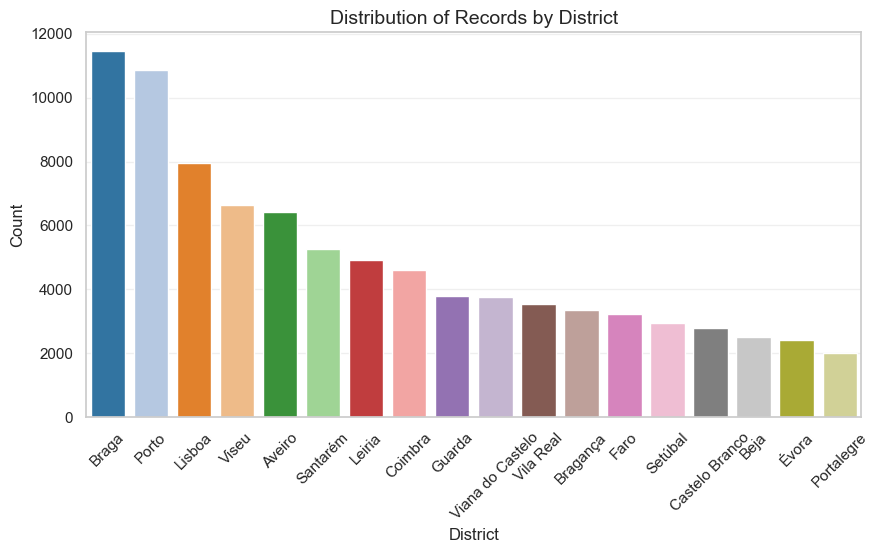

In [71]:
sns.set(style='whitegrid')
district_counts = df['District'].value_counts()

plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='District',
    palette='tab20',
    order=district_counts.index
)
plt.title('Distribution of Records by District', fontsize=14)
plt.ylabel('Count')
plt.xlabel('District')
plt.xticks(rotation=45)
plt.grid(alpha=0.3, axis='y')
plt.show()

### Distribution of Records by Technology Type

This plot shows the number of installations by technology type.
Because some technologies are much more common than others, a logarithmic scale is used on the y-axis to better visualize the full range of frequencies.

C:\Users\iaras\AppData\Local\Temp\ipykernel_33760\1343449652.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


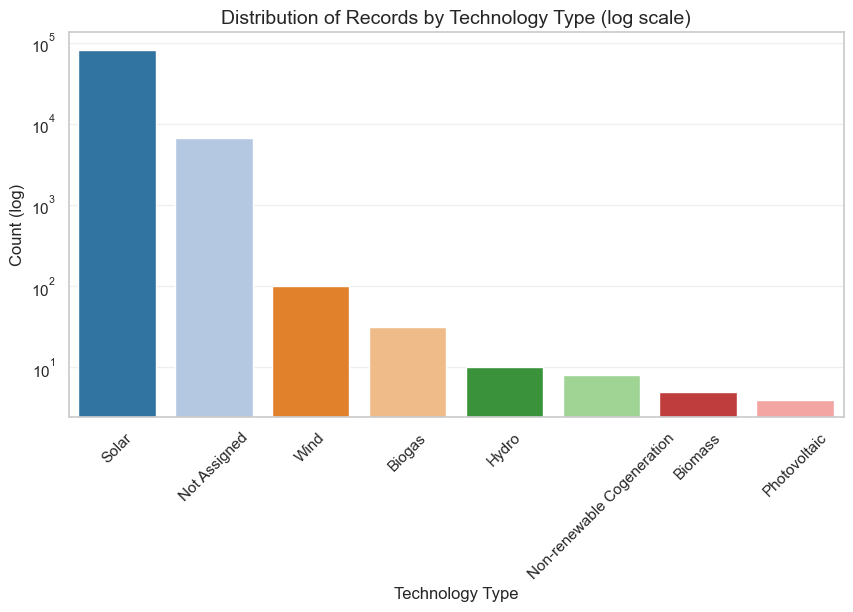

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='Technology Type',
    palette='tab20',
    order=df['Technology Type'].value_counts().index
)
plt.yscale('log')
plt.title('Distribution of Records by Technology Type (log scale)', fontsize=14)
plt.ylabel('Count (log)')
plt.xlabel('Technology Type')
plt.xticks(rotation=45)
plt.grid(alpha=0.3, axis='y')
plt.show()


### Distribution of Records by Installed Power Range (kW)

This plot shows the distribution of installations according to their installed power range.
A logarithmic y-axis is used to account for the large imbalance between the smallest and largest ranges.

C:\Users\iaras\AppData\Local\Temp\ipykernel_33760\4141494882.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


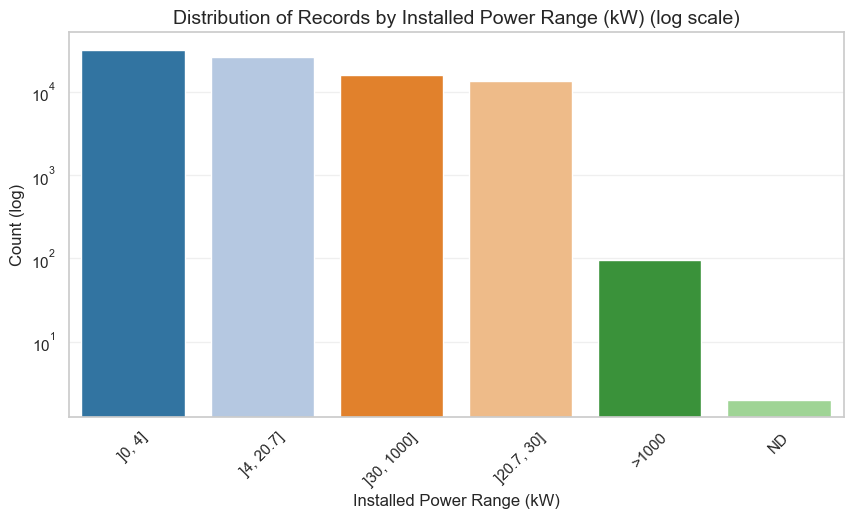

In [50]:
sns.set(style='whitegrid')
power_range_counts = df['Installed power range (kW)'].value_counts()

plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='Installed power range (kW)',
    palette='tab20',
    order=power_range_counts.index
)
plt.yscale('log')
plt.title('Distribution of Records by Installed Power Range (kW) (log scale)', fontsize=14)
plt.ylabel('Count (log)')
plt.xlabel('Installed Power Range (kW)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3, axis='y')
plt.show()

In [51]:
# Count values per Installed Power Range
power_range_counts = df['Installed power range (kW)'].value_counts()

print("Count by Installed Power Range (kW):")
print(power_range_counts)


Count by Installed Power Range (kW):
Installed power range (kW)
]0, 4]        32320
]4, 20.7]     26346
]30, 1000]    16244
]20.7, 30]    13504
>1000            95
ND                2
Name: count, dtype: int64


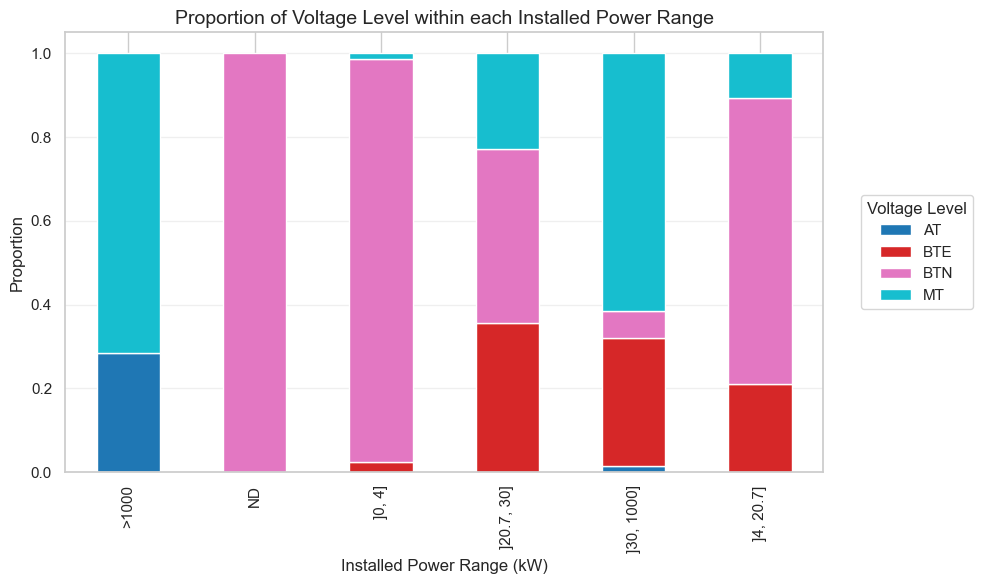

In [79]:
prop_table = (cross_tab.T / cross_tab.T.sum()).T

ax = prop_table.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    colormap='tab10'
)

plt.title('Proportion of Voltage Level within each Installed Power Range', fontsize=14)
plt.ylabel('Proportion')
plt.xlabel('Installed Power Range (kW)')
plt.grid(alpha=0.3, axis='y')

# Mover a legenda para fora (lado direito)
plt.legend(
    title='Voltage Level',
    bbox_to_anchor=(1.05, 0.5),
    loc='center left',
    borderaxespad=0.
)

plt.tight_layout()
plt.show()


C:\Users\iaras\AppData\Local\Temp\ipykernel_33760\3641991311.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(left[idx] + value/2, idx, str(value), va='center', ha='center', color='white', fontsize=9)
C:\Users\iaras\AppData\Local\Temp\ipykernel_33760\3641991311.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(left[idx] + value/2, idx, str(value), va='center', ha='center', color='white', fontsize=9)
C:\Users\iaras\AppData\Local\Temp\ipykernel_33760\3641991311.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treat

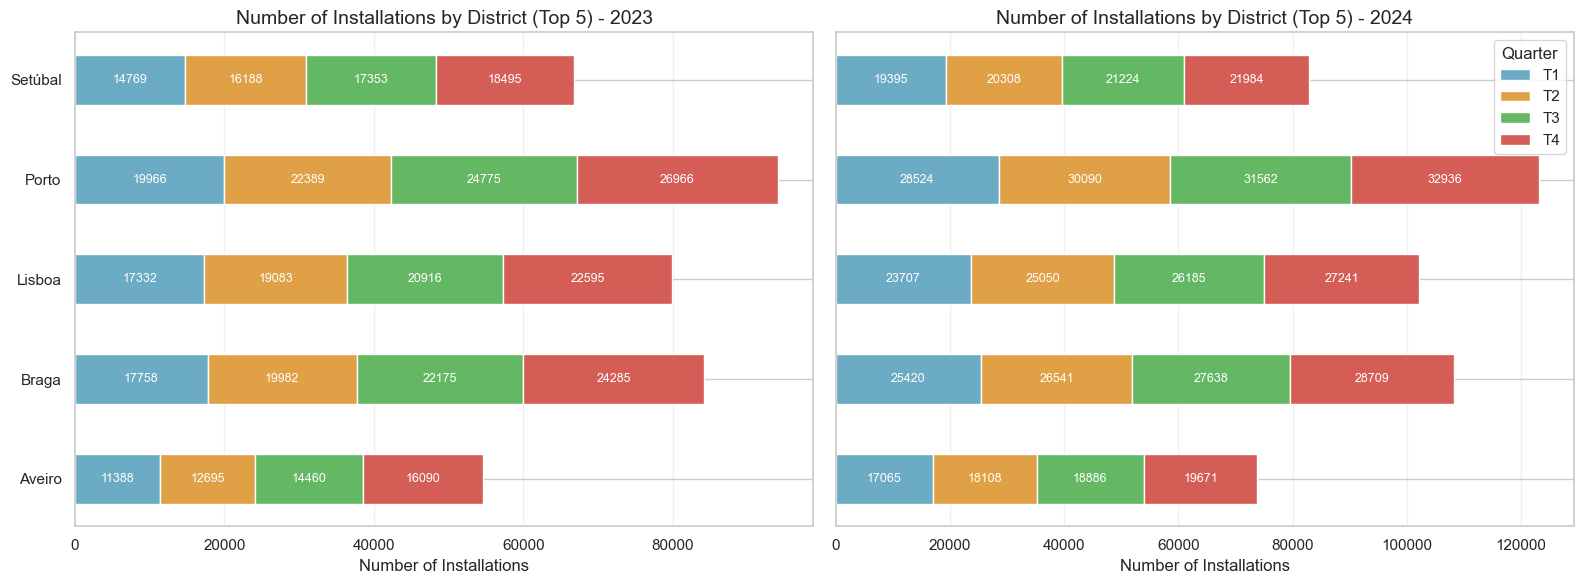

In [52]:
sns.set(style='whitegrid')

def prepare_data(df, year):
    # Filter by year
    df_year = df[df['Quarter'].str.startswith(str(year))]
    # Top 5 districts with most installations
    top_districts = df_year.groupby('District')['Number of installations'].sum().sort_values(ascending=False).head(5).index

    # Prepare data for stacked bar
    stack_data = df_year[df_year['District'].isin(top_districts)]
    stack_data = stack_data.groupby(['District', 'Quarter'])['Number of installations'].sum().unstack(fill_value=0)
    
    quarters_order = [f'{year}T1', f'{year}T2', f'{year}T3', f'{year}T4']
    stack_data = stack_data.reindex(columns=quarters_order, fill_value=0)
    
    return stack_data, quarters_order

colors = ["#6babc3", "#e0a046", "#64b864", "#d45d56"]

stack_2023, quarters_2023 = prepare_data(df_final, 2023)
stack_2024, quarters_2024 = prepare_data(df_final, 2024)

fig, axes = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

for ax, stack_data, year, quarters_order in zip(axes, [stack_2023, stack_2024], [2023, 2024], [quarters_2023, quarters_2024]):
    left = pd.Series([0]*len(stack_data), index=stack_data.index)
    for i, quarter in enumerate(quarters_order):
        ax.barh(stack_data.index, stack_data[quarter], left=left, color=colors[i], label=quarter[-2:], height=0.5)
        
        for idx, value in enumerate(stack_data[quarter]):
            if value > 0:
                ax.text(left[idx] + value/2, idx, str(value), va='center', ha='center', color='white', fontsize=9)
        left += stack_data[quarter]
    
    ax.set_xlabel('Number of Installations')
    ax.set_title(f'Number of Installations by District (Top 5) - {year}', fontsize=14)
    ax.grid(alpha=0.3, axis='x')

axes[1].legend(title='Quarter')
plt.tight_layout()
plt.show()


C:\Users\iaras\AppData\Local\Temp\ipykernel_33760\1474336408.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(left[idx] + value/2, idx, str(value), va='center', ha='center', color='white', fontsize=9)
C:\Users\iaras\AppData\Local\Temp\ipykernel_33760\1474336408.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(left[idx] + value/2, idx, str(value), va='center', ha='center', color='white', fontsize=9)
C:\Users\iaras\AppData\Local\Temp\ipykernel_33760\1474336408.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treat

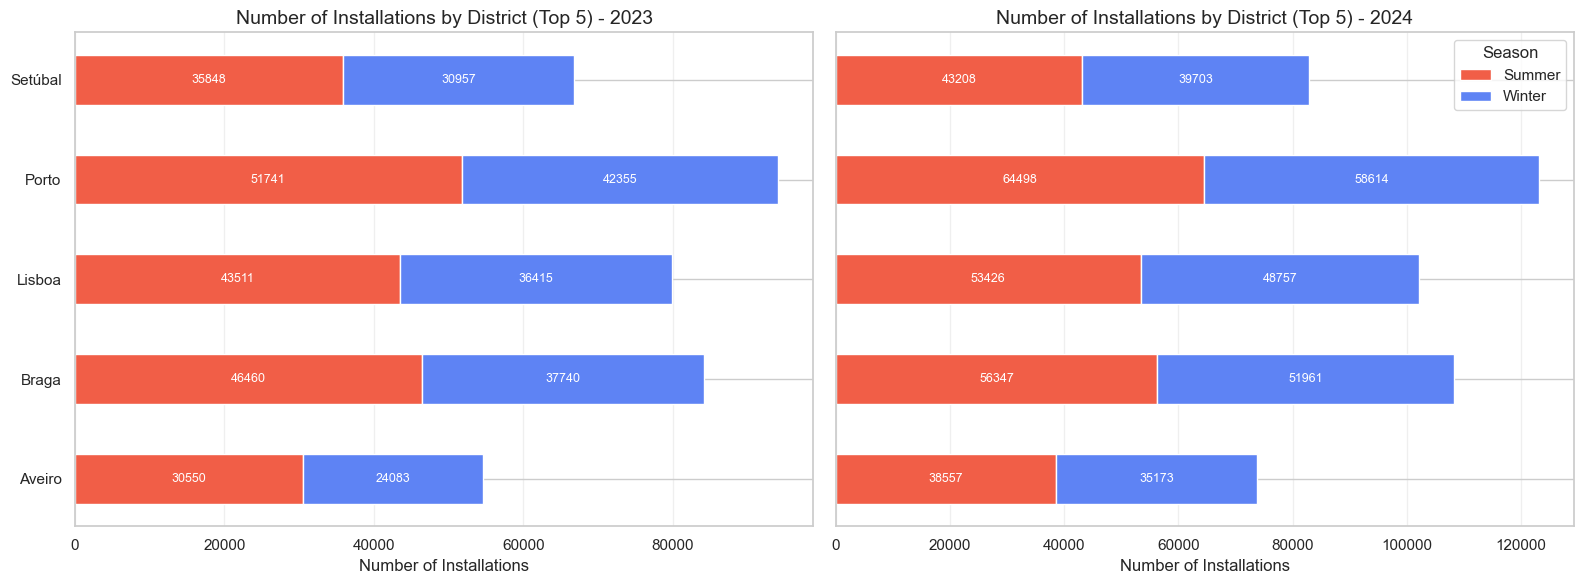

In [53]:
sns.set(style='whitegrid')
# Function to prepare stacked bar data by Season
def prepare_data_season(df, year):
    df_year = df[df['Quarter'].str.startswith(str(year))]
    # Top 5 districts with most installations
    top_districts = df_year.groupby('District')['Number of installations'].sum().sort_values(ascending=False).head(5).index
    
    # Prepare data for stacked bar
    stack_data = df_year[df_year['District'].isin(top_districts)]
    stack_data = stack_data.groupby(['District', 'Season'])['Number of installations'].sum().unstack(fill_value=0)
    
    seasons_order = ['Summer', 'Winter']  # English translation
    stack_data = stack_data.reindex(columns=seasons_order, fill_value=0)
    
    return stack_data, seasons_order

colors = ["#f15e47", "#5e83f4"]

stack_2023, seasons_2023 = prepare_data_season(df_final, 2023)
stack_2024, seasons_2024 = prepare_data_season(df_final, 2024)

fig, axes = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

for ax, stack_data, year, seasons_order in zip(axes, [stack_2023, stack_2024], [2023, 2024], [seasons_2023, seasons_2024]):
    left = pd.Series([0]*len(stack_data), index=stack_data.index)
    for i, season in enumerate(seasons_order):
        ax.barh(stack_data.index, stack_data[season], left=left, color=colors[i], label=season, height=0.5)
        
        for idx, value in enumerate(stack_data[season]):
            if value > 0:
                ax.text(left[idx] + value/2, idx, str(value), va='center', ha='center', color='white', fontsize=9)
        left += stack_data[season]
    
    ax.set_xlabel('Number of Installations')
    ax.set_title(f'Number of Installations by District (Top 5) - {year}', fontsize=14)
    ax.grid(alpha=0.3, axis='x')

axes[1].legend(title='Season')
plt.tight_layout()
plt.show()


C:\Users\iaras\AppData\Local\Temp\ipykernel_33760\799569585.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


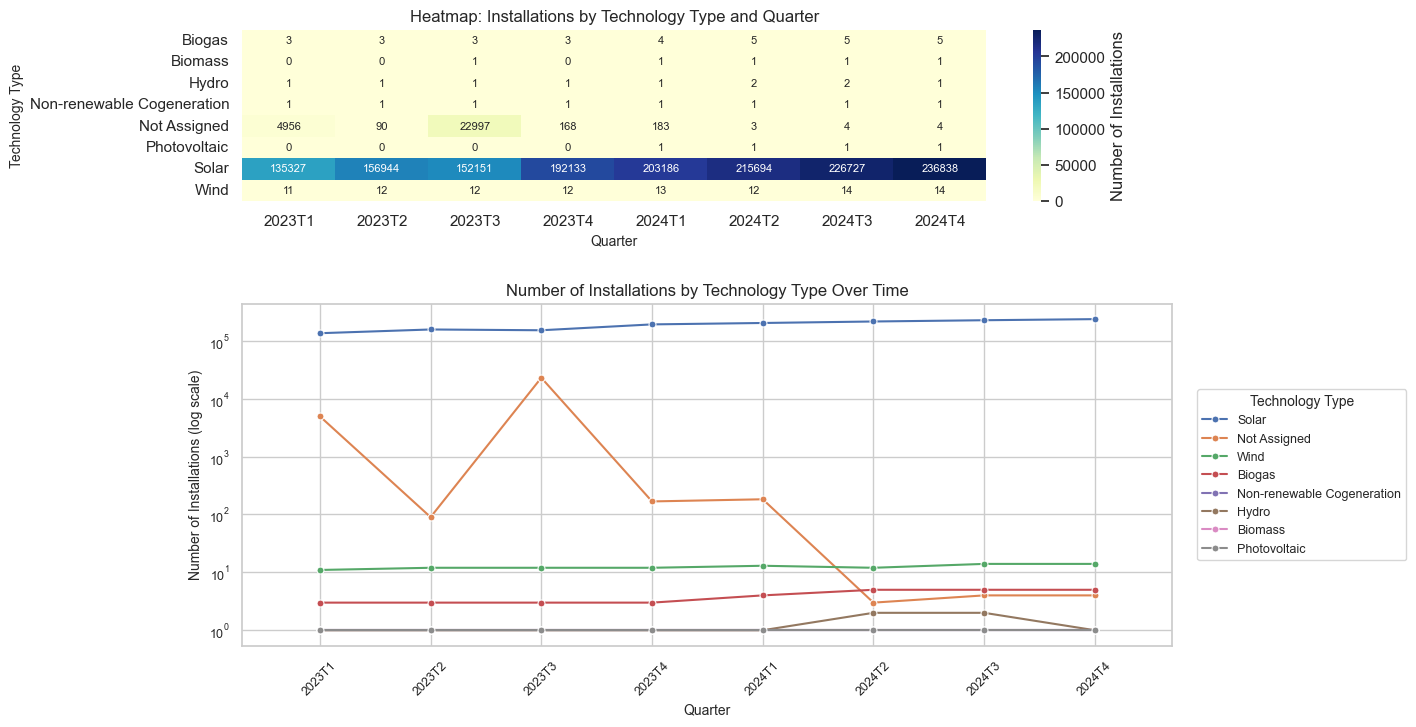

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style='whitegrid')

# Quarters desejados
quarters_desired = [
    '2023T1','2023T2','2023T3','2023T4',
    '2024T1','2024T2','2024T3','2024T4'
]

# Tipologias únicas
tech_types = df_final['Technology Type'].unique()

# Agrupar número de instalações por Quarter e Technology Type
grouped = (
    df_final[df_final['Quarter'].isin(quarters_desired)]
    .groupby(['Quarter', 'Technology Type'])['Number of installations']
    .sum()
    .reset_index()
)

# Garantir todas as combinações Quarter x Technology Type
all_combinations = pd.MultiIndex.from_product(
    [quarters_desired, tech_types],
    names=['Quarter','Technology Type']
)
grouped_full = grouped.set_index(['Quarter','Technology Type']).reindex(all_combinations, fill_value=0).reset_index()

# Substituir zeros por 1 (para escala logarítmica)
grouped_full['Number of installations_plot'] = grouped_full['Number of installations'].replace(0, 1)

# Pivot table para heatmap
pivot_heat = grouped_full.pivot(index='Technology Type', columns='Quarter', values='Number of installations').fillna(0)

# Criar figura com heatmap acima e line plot abaixo
fig, (ax_heat, ax_line) = plt.subplots(
    nrows=2,
    figsize=(12, 8),
    gridspec_kw={'height_ratios': [1, 2], 'hspace': 0.4}  # mais espaço entre heatmap e line plot
)

# ----- HEATMAP (acima) -----
sns.heatmap(
    pivot_heat,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu',
    ax=ax_heat,
    cbar_kws={'label': 'Number of Installations'},
    annot_kws={'fontsize': 8}
)
ax_heat.set_title('Heatmap: Installations by Technology Type and Quarter', fontsize=12)
ax_heat.set_xlabel('Quarter', fontsize=10)
ax_heat.set_ylabel('Technology Type', fontsize=10)

# ----- LINE PLOT (abaixo) -----
sns.lineplot(
    data=grouped_full,
    x='Quarter',
    y='Number of installations_plot',
    hue='Technology Type',
    marker='o',
    ax=ax_line,
    markersize=5
)
ax_line.set_yscale('log')
ax_line.set_title('Number of Installations by Technology Type Over Time', fontsize=12)
ax_line.set_xlabel('Quarter', fontsize=10)
ax_line.set_ylabel('Number of Installations (log scale)', fontsize=10)
ax_line.tick_params(axis='x', rotation=45)
ax_line.tick_params(labelsize=9)

# Ajustar limites do eixo x para centralizar melhor
ax_line.set_xlim(-0.7, len(quarters_desired)-0.3)  # margem extra à esquerda e direita

# Legenda à direita do line plot
handles, labels = ax_line.get_legend_handles_labels()
ax_line.legend(
    handles=handles,
    labels=labels,
    title='Technology Type',
    title_fontsize=10,
    loc='center left',          # centralizado verticalmente à esquerda
    bbox_to_anchor=(1.02, 0.5), # deslocar para fora do gráfico à direita
    ncol=1,
    fontsize=9
)

plt.tight_layout()
plt.show()
